In [440]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings

warnings.filterwarnings("ignore")


from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

In [441]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")

In [442]:
print(f"Shape Of The new_dfset : {data.shape}")
print(f"\nGlimpse Of The new_dfset :")
data.head().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

Shape Of The new_dfset : (2240, 29)

Glimpse Of The new_dfset :


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [443]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeal

In [444]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

Summary Of The Dataset :


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


In [445]:
data.describe(include=object).T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [446]:
print(f"Null values of the new_dfset :")
data.isna().sum().to_frame().T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

Null values of the new_dfset :


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [447]:
data.dropna(axis=0, inplace=True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

After dropping null values, the shape of the Dataset is (2216, 29)
After dropping null values, null values of the Dataset :


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [448]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print(f"Newest customer's enrolment date is {max(dates)}")
print(f"Oldest customer's enrolment date is {min(dates)}")

Newest customer's enrolment date is 2014-06-29
Oldest customer's enrolment date is 2012-07-30


In [449]:
days = []
newest = max(dates)
for i in dates:
    duration = newest - i
    days.append(duration)
data["Customer Loyalty"] = days
data["Customer Loyalty"] = data["Customer Loyalty"].dt.days
data["Age"] = 2024 - data["Year_Birth"]
data["Spent"] = (
    data["MntWines"]
    + data["MntFruits"]
    + data["MntMeatProducts"]
    + data["MntFishProducts"]
    + data["MntSweetProducts"]
    + data["MntGoldProds"]
)
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Parental Status"] = np.where(data["Children"] > 0, 1, 0)
data["Marital_Status"].replace(
    {
        "Married": "Couple",
        "Together": "Couple",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    },
    inplace=True,
)
data["Education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    },
    inplace=True,
)
data["Total Promo"] = (
    data["AcceptedCmp1"]
    + data["AcceptedCmp2"]
    + data["AcceptedCmp3"]
    + data["AcceptedCmp4"]
    + data["AcceptedCmp5"]
)
data["Purchases"] = (
    data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]
)
data.rename(
    columns={
        "Marital_Status": "Marital Status",
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold",
        "NumWebPurchases": "Web",
        "NumCatalogPurchases": "Catalog",
        "NumStorePurchases": "Store",
        "NumDealsPurchases": "Discount Purchases",
    },
    inplace=True,
)
data = data[
    [
        "ID",
        "Age",
        "Education",
        "Marital Status",
        "Parental Status",
        "Children",
        "Kidhome",
        "Teenhome",
        "Income",
        "Spent",
        "Customer Loyalty",
        "Recency",
        "Wines",
        "Fruits",
        "Meat",
        "Fish",
        "Sweets",
        "Gold",
        "Web",
        "Catalog",
        "Store",
        "Discount Purchases",
        "Total Promo",
        "NumWebVisitsMonth",
        "Purchases",
    ]
]


new_df = data[
    [
        "Customer Loyalty",
        "Income",
        "Age",
        "Spent",
        "Children",
        "Marital Status",
        "Education",
        "Total Promo",
        "Purchases",
    ]
].copy()

# outliers:
data = data[data["Age"] < 90]
data = data[data["Income"] < 600000]
new_df = new_df[new_df["Age"] < 90]
new_df = new_df[new_df["Income"] < 600000]

In [450]:
print("After preprocessing, let's have a glimpse of the final dataset :")
new_df.head().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

After preprocessing, let's have a glimpse of the final dataset :


,Customer Loyalty,Income,Age,Spent,Children,Marital Status,Education,Total Promo,Purchases
0,663,58138.000000,67,1617,0,Alone,Graduate,0,22
1,113,46344.000000,70,27,2,Alone,Graduate,0,4
2,312,71613.000000,59,776,0,Couple,Graduate,0,20
3,139,26646.000000,40,53,1,Couple,Graduate,0,6
4,161,58293.000000,43,422,1,Couple,Postgraduate,0,14


In [451]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
new_df.describe().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

After preprocessing, let's have a look on the summary of the dataset :


,Customer Loyalty,Income,Age,Spent,Children,Total Promo,Purchases
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,353.714286,51958.810579,55.086347,607.268083,0.947559,0.298373,12.566908
std,202.494886,21527.278844,11.701599,602.513364,0.749466,0.679570,7.205427
min,0.000000,1730.000000,28.000000,5.000000,0.000000,0.000000,0.000000
25%,180.000000,35233.500000,47.000000,69.000000,0.000000,0.000000,6.000000
50%,356.000000,51371.000000,54.000000,397.000000,1.000000,0.000000,12.000000
75%,529.000000,68487.000000,65.000000,1048.000000,1.000000,0.000000,18.250000
max,699.000000,162397.000000,84.000000,2525.000000,3.000000,4.000000,32.000000


In [452]:
new_df.describe(include=object).T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

,count,unique,top,freq
Marital Status,2212,2,Couple,1428
Education,2212,3,Graduate,1115


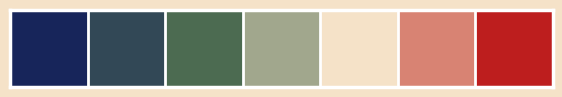

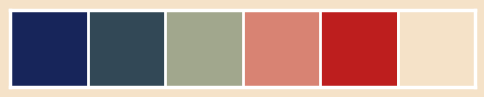

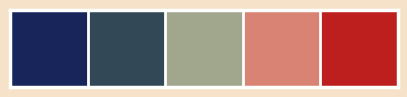

In [453]:
sns.set_style("white")
sns.set(rc={"axes.facecolor": "#F5E2C8", "figure.facecolor": "#F5E2C8"})
sns.set_context("poster", font_scale=0.7)

palette = ["#17255A", "#324856", "#4C6B51", "#A1A78D", "#F5E2C8", "#D88373", "#BD1E1E"]
# palette_cmap = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
palette_cmap = ["#17255A", "#324856", "#A1A78D", "#D88373", "#BD1E1E", "#F5E2C8"]
cluster = ["#17255A", "#324856", "#A1A78D", "#D88373", "#BD1E1E"]

sns.palplot(sns.color_palette(palette))
sns.palplot(sns.color_palette(palette_cmap))
sns.palplot(sns.color_palette(cluster))
plt.show()

# 682F2F #585858

Rozkład gęstości wieku klientów:


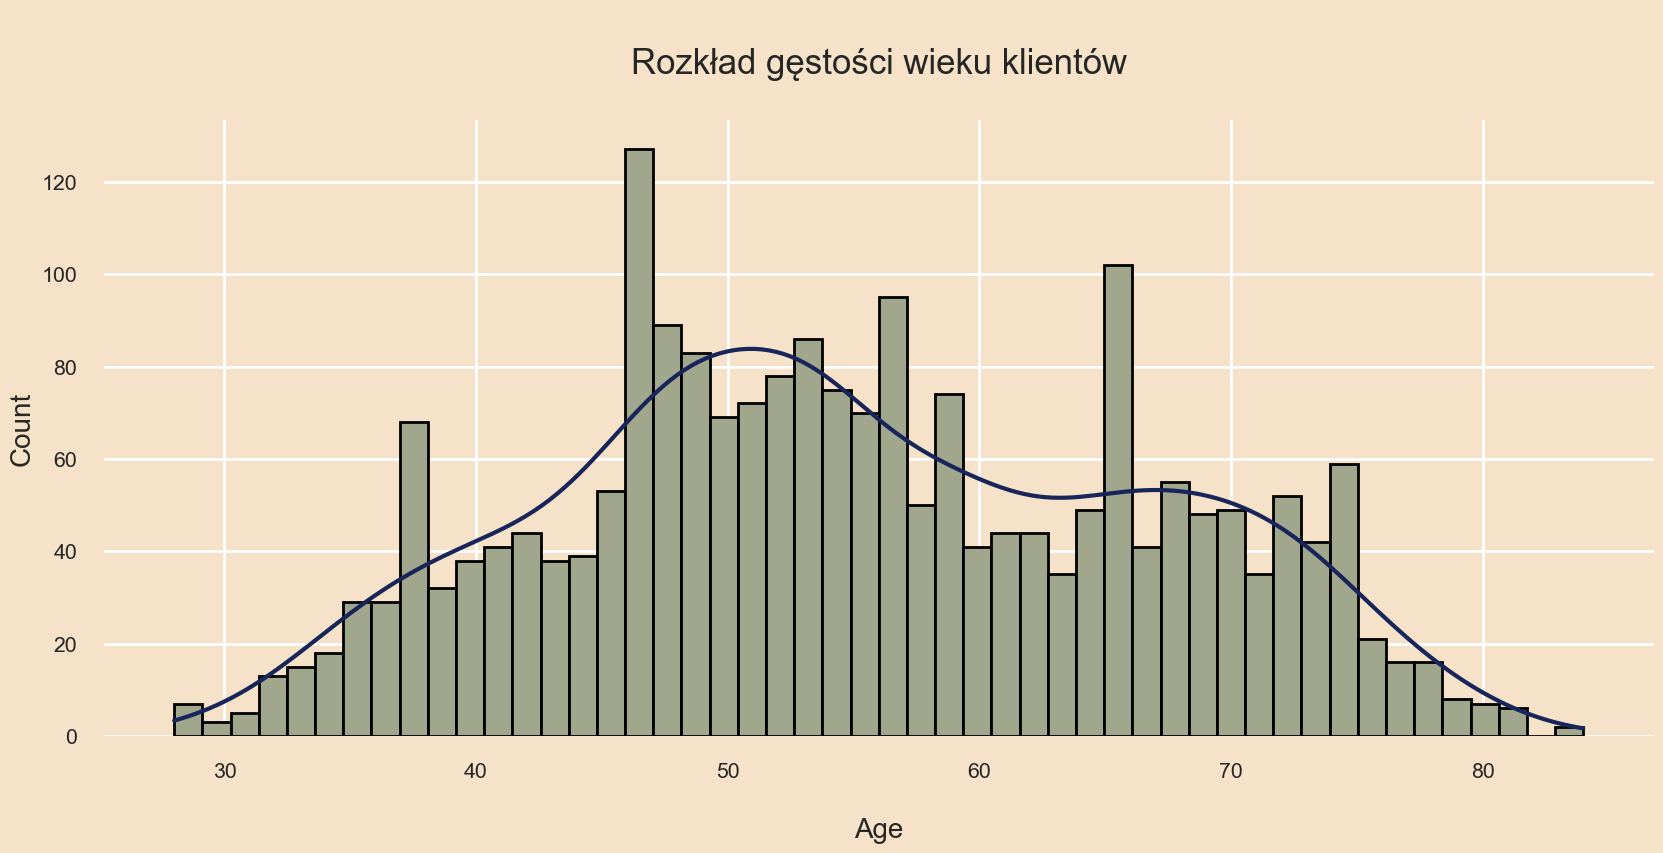

In [454]:
print(f"Rozkład gęstości wieku klientów:")
plt.subplots(figsize=(20, 8))
p = sns.histplot(
    new_df["Age"],
    color="#A1A78D",
    kde=True,
    bins=50,
    alpha=1,
    fill=True,
    edgecolor="black",
)
p.axes.lines[0].set_color(palette[0])
p.axes.set_title("\nRozkład gęstości wieku klientów\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nAge", fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the distribution of customer's income and spending :


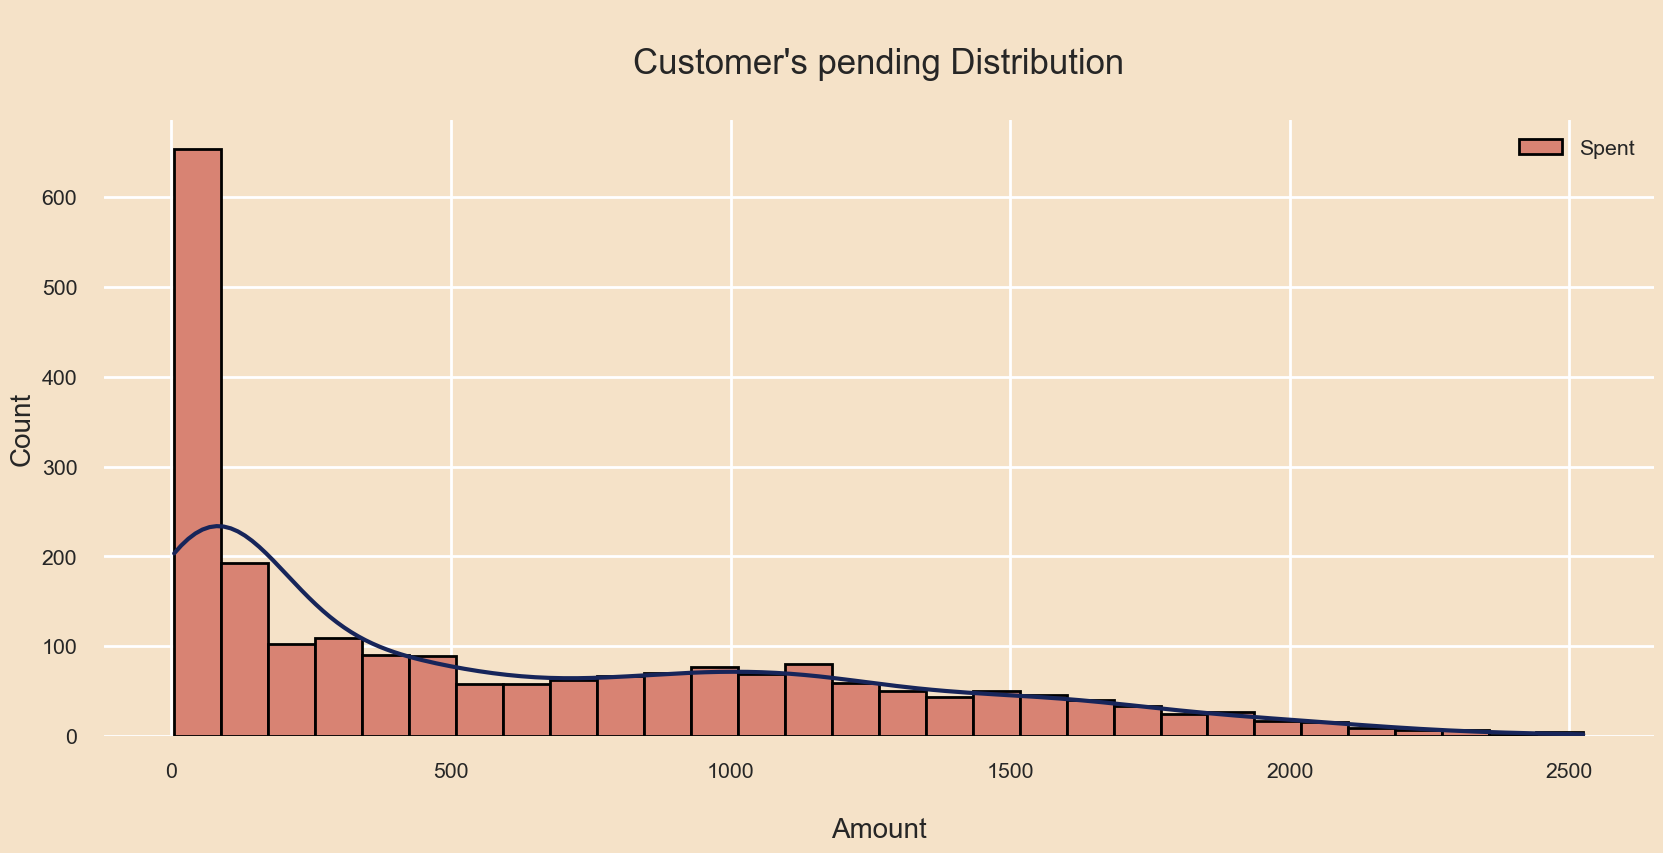

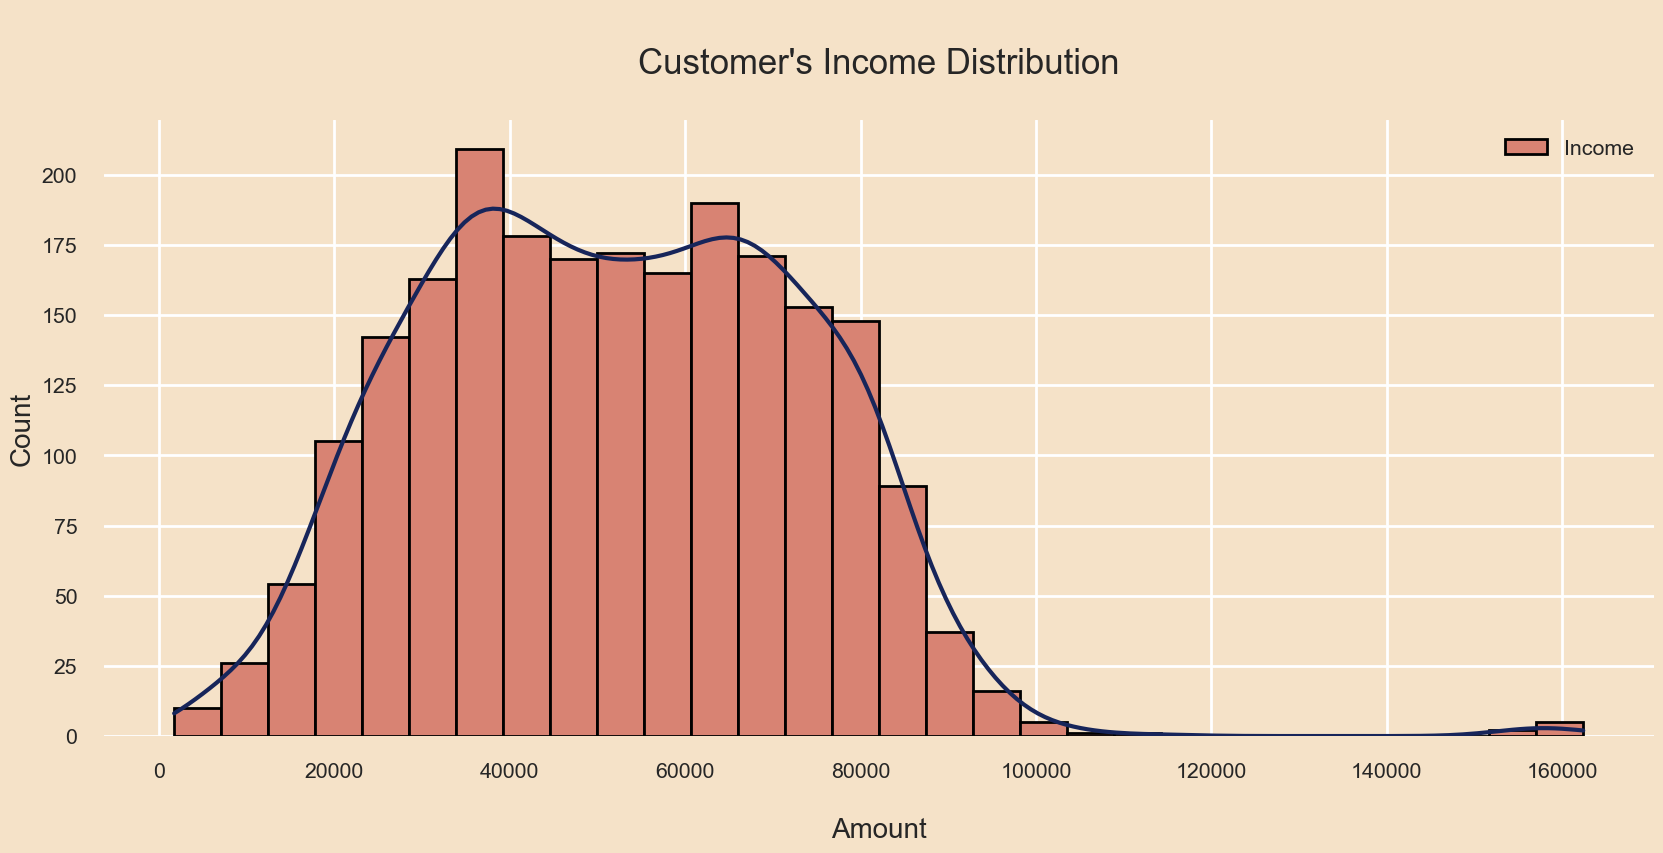

In [455]:
print(f"Let's have a look on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(
    new_df[["Spent"]],
    palette=["#D88373", "#A1A78D"],
    kde=True,
    bins=30,
    alpha=1,
    fill=True,
    edgecolor="black",
)
p.axes.lines[0].set_color(palette[0])
# p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's pending Distribution\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nAmount", fontsize=20)
sns.despine(left=True, bottom=True)

plt.subplots(figsize=(20, 8))
p = sns.histplot(
    new_df[["Income"]],
    palette=["#D88373", "#A1A78D"],
    kde=True,
    bins=30,
    alpha=1,
    fill=True,
    edgecolor="black",
)
p.axes.lines[0].set_color(palette[0])
# p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income Distribution\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nAmount", fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the customer's education :


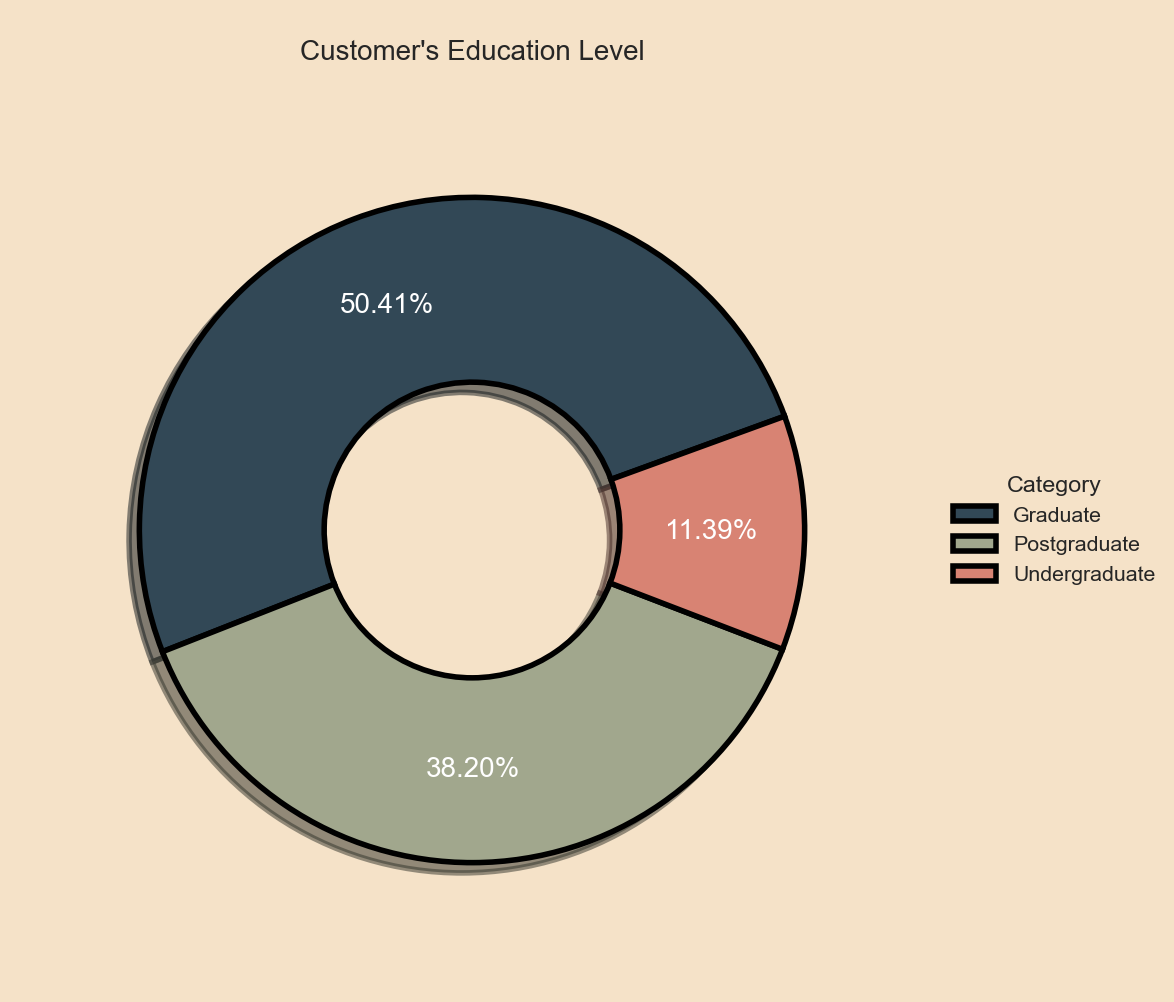

In [456]:
print(f"Let's have a look on the customer's education :")
plt.subplots(figsize=(12, 12))

labels = "Graduate", "Postgraduate", "Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie(
    [
        new_df["Education"].value_counts()[0],
        new_df["Education"].value_counts()[1],
        new_df["Education"].value_counts()[2],
    ],
    explode=(0, 0, 0),
    textprops=dict(size=20, color="white"),
    autopct="%.2f%%",
    pctdistance=0.72,
    radius=0.9,
    colors=["#324856", "#A1A78D", "#D88373"],
    shadow=True,
    wedgeprops=dict(width=size, edgecolor="black", linewidth=4),
    startangle=20,
)

plt.legend(
    wedges,
    labels,
    title="Category",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    edgecolor="black",
)
plt.title("\nCustomer's Education Level", fontsize=20)
plt.show()

Let's have a look on the distribution of customer's income and spending on basis of education level :


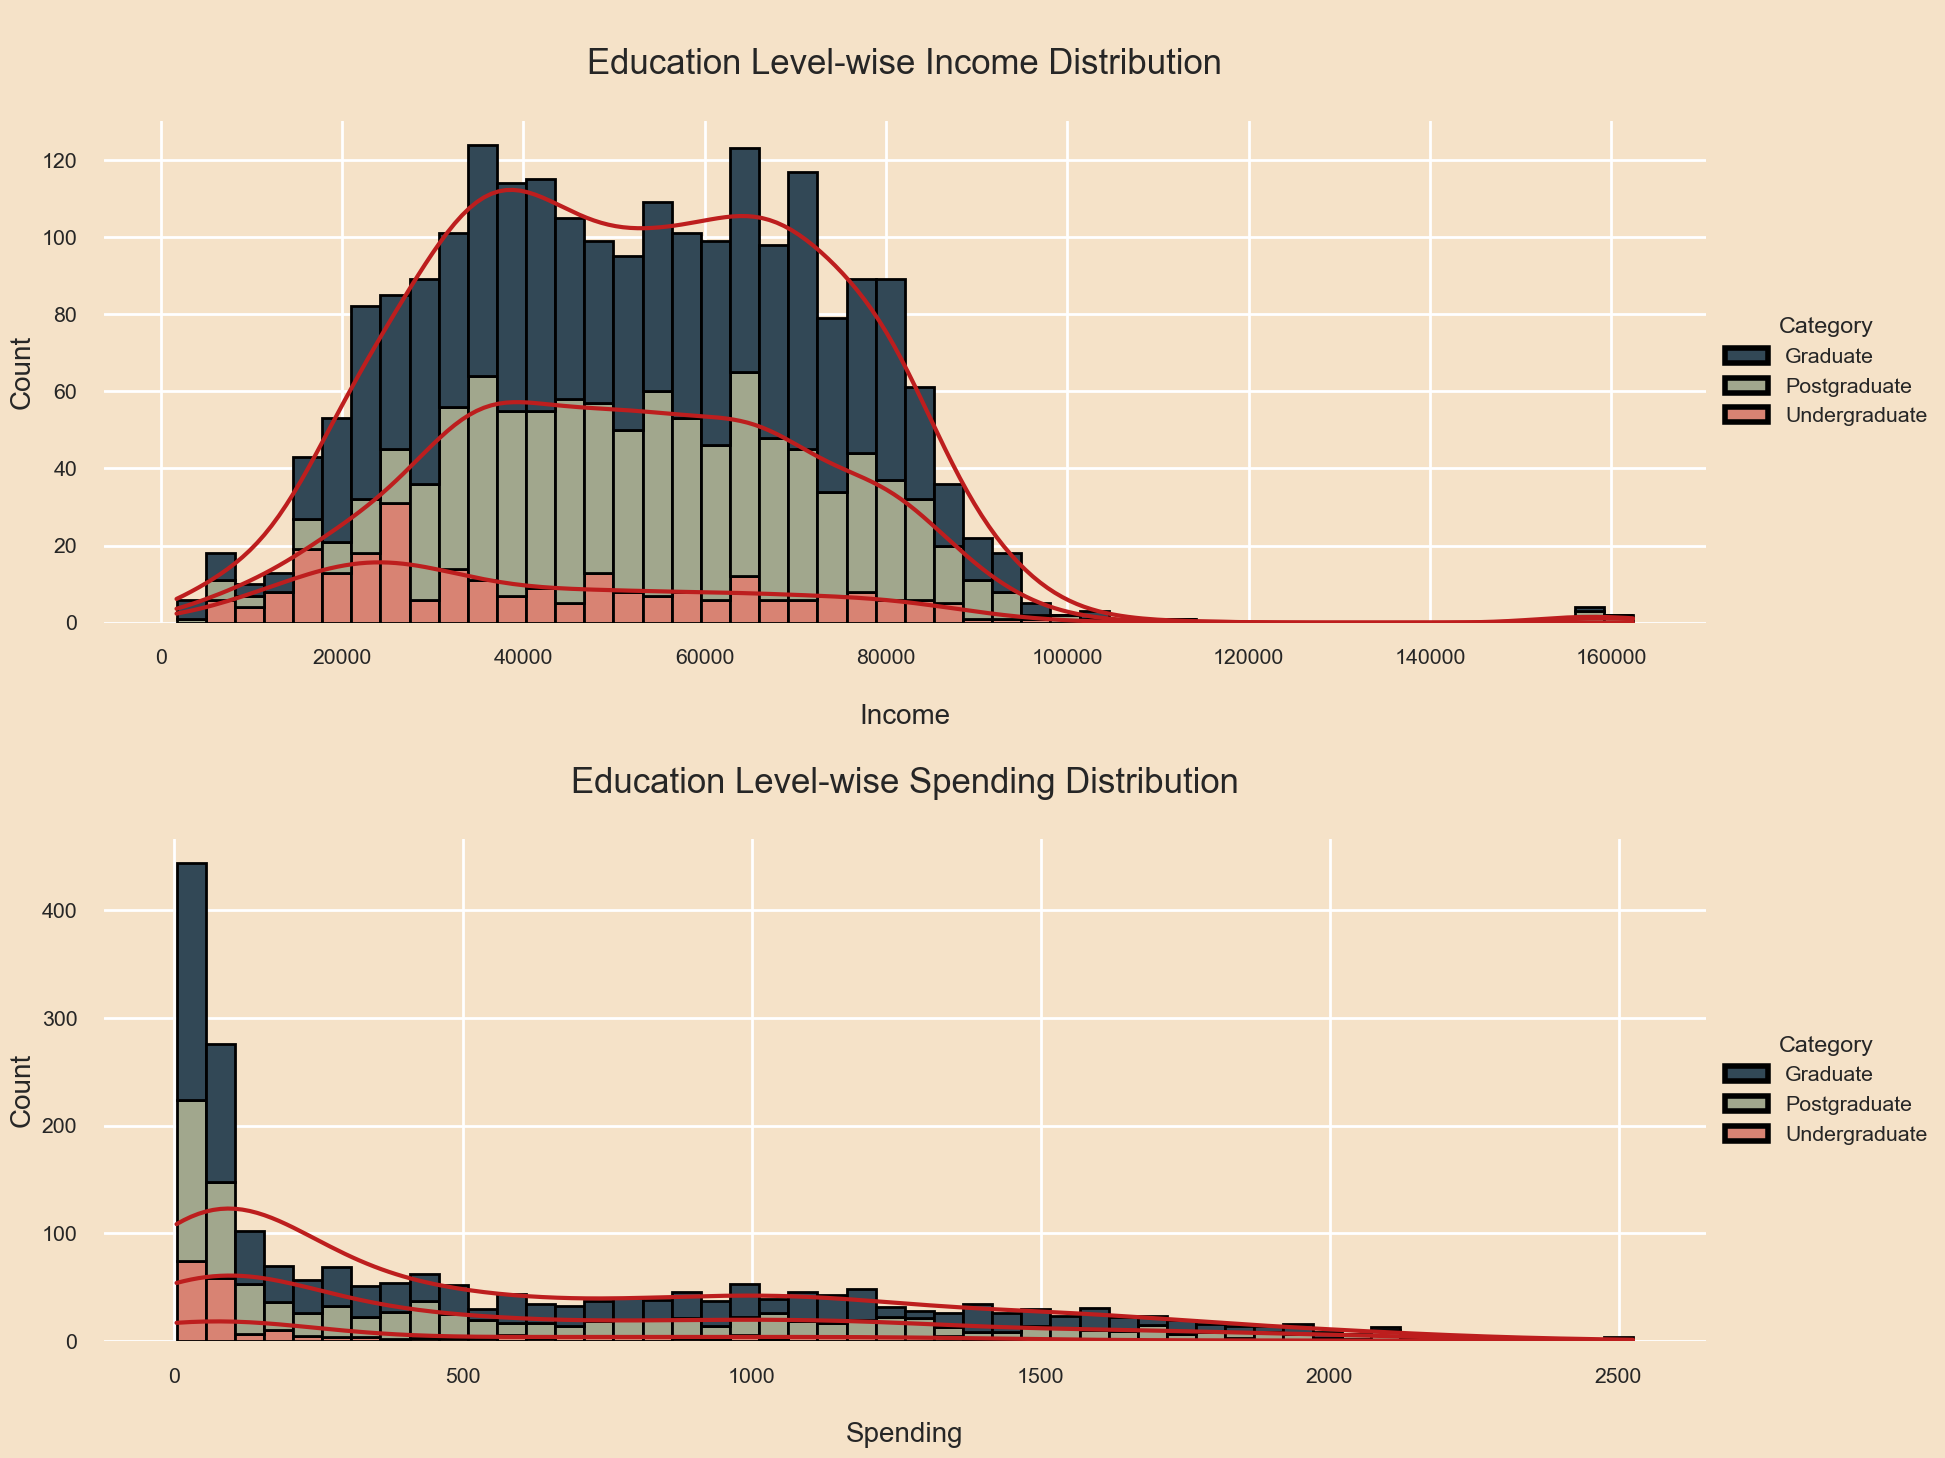

In [457]:
print(
    f"Let's have a look on the distribution of customer's income and spending on basis of education level :"
)

_, axes = plt.subplots(2, 1, figsize=(20, 16), sharex=False)
plt.tight_layout(pad=7.0)

sns.histplot(
    data=new_df,
    x="Income",
    hue="Education",
    multiple="stack",
    palette=["#324856", "#A1A78D", "#D88373"],
    ax=axes[0],
    kde=True,
    bins=50,
    alpha=1,
    fill=True,
    edgecolor="black",
)
axes[0].lines[0].set_color(palette[6])
axes[0].lines[1].set_color(palette[6])
axes[0].lines[2].set_color(palette[6])
# axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n", fontsize=25)
axes[0].set_ylabel("Count", fontsize=20)
axes[0].set_xlabel("\nIncome", fontsize=20)
axes[0].legend(
    wedges,
    labels,
    title="Category",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    edgecolor="black",
)


sns.histplot(
    data=new_df,
    x="Spent",
    hue="Education",
    multiple="stack",
    palette=["#324856", "#A1A78D", "#D88373"],
    ax=axes[1],
    kde=True,
    bins=50,
    alpha=1,
    fill=True,
    edgecolor="black",
)
axes[1].lines[0].set_color(palette[6])
axes[1].lines[1].set_color(palette[6])
axes[1].lines[2].set_color(palette[6])
# axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n", fontsize=25)
axes[1].set_ylabel("Count", fontsize=20)
axes[1].set_xlabel("\nSpending", fontsize=20)
axes[1].legend(
    wedges,
    labels,
    title="Category",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    edgecolor="black",
)

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the distribution of customer's children :


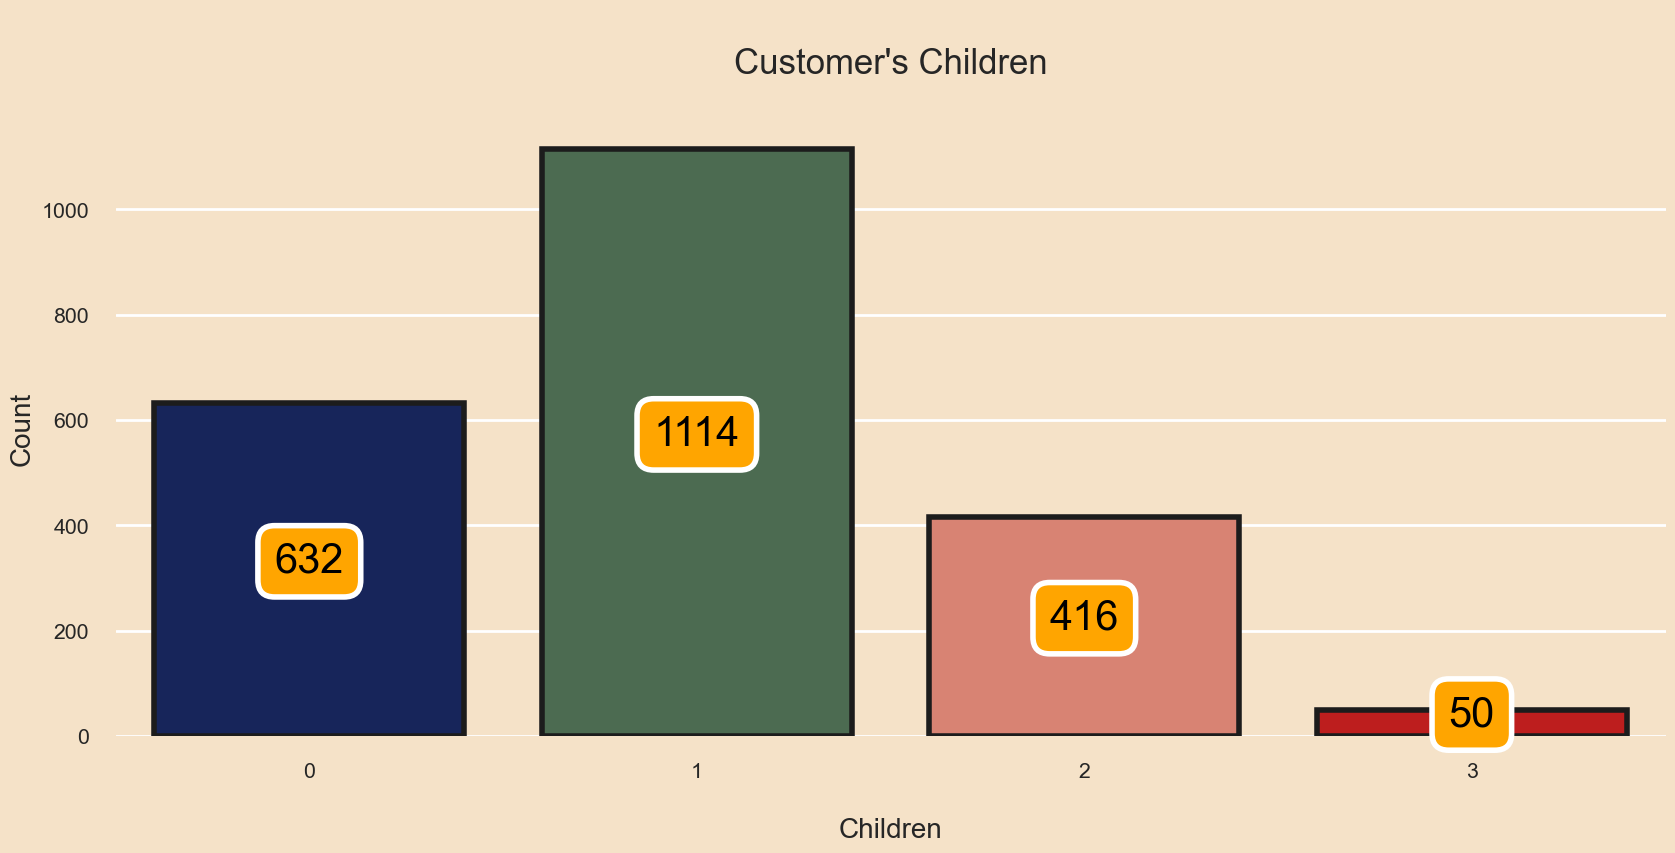

In [458]:
print(f"Let's have a look on the distribution of customer's children :")
plt.subplots(figsize=(20, 8))
p = sns.countplot(
    x=new_df["Children"],
    palette=["#17255A", "#4C6B51", "#D88373", "#BD1E1E"],
    saturation=1,
    edgecolor="#1c1c1c",
    linewidth=4,
)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n", fontsize=25)
p.axes.set_ylabel("Count", fontsize=20)
p.axes.set_xlabel("\nChildren", fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation=0)
for container in p.containers:
    p.bar_label(
        container,
        label_type="center",
        padding=6,
        size=30,
        color="black",
        rotation=0,
        bbox={
            "boxstyle": "round",
            "pad": 0.4,
            "facecolor": "orange",
            "edgecolor": "white",
            "linewidth": 4,
            "alpha": 1,
        },
    )


sns.despine(left=True, bottom=True)
plt.show()

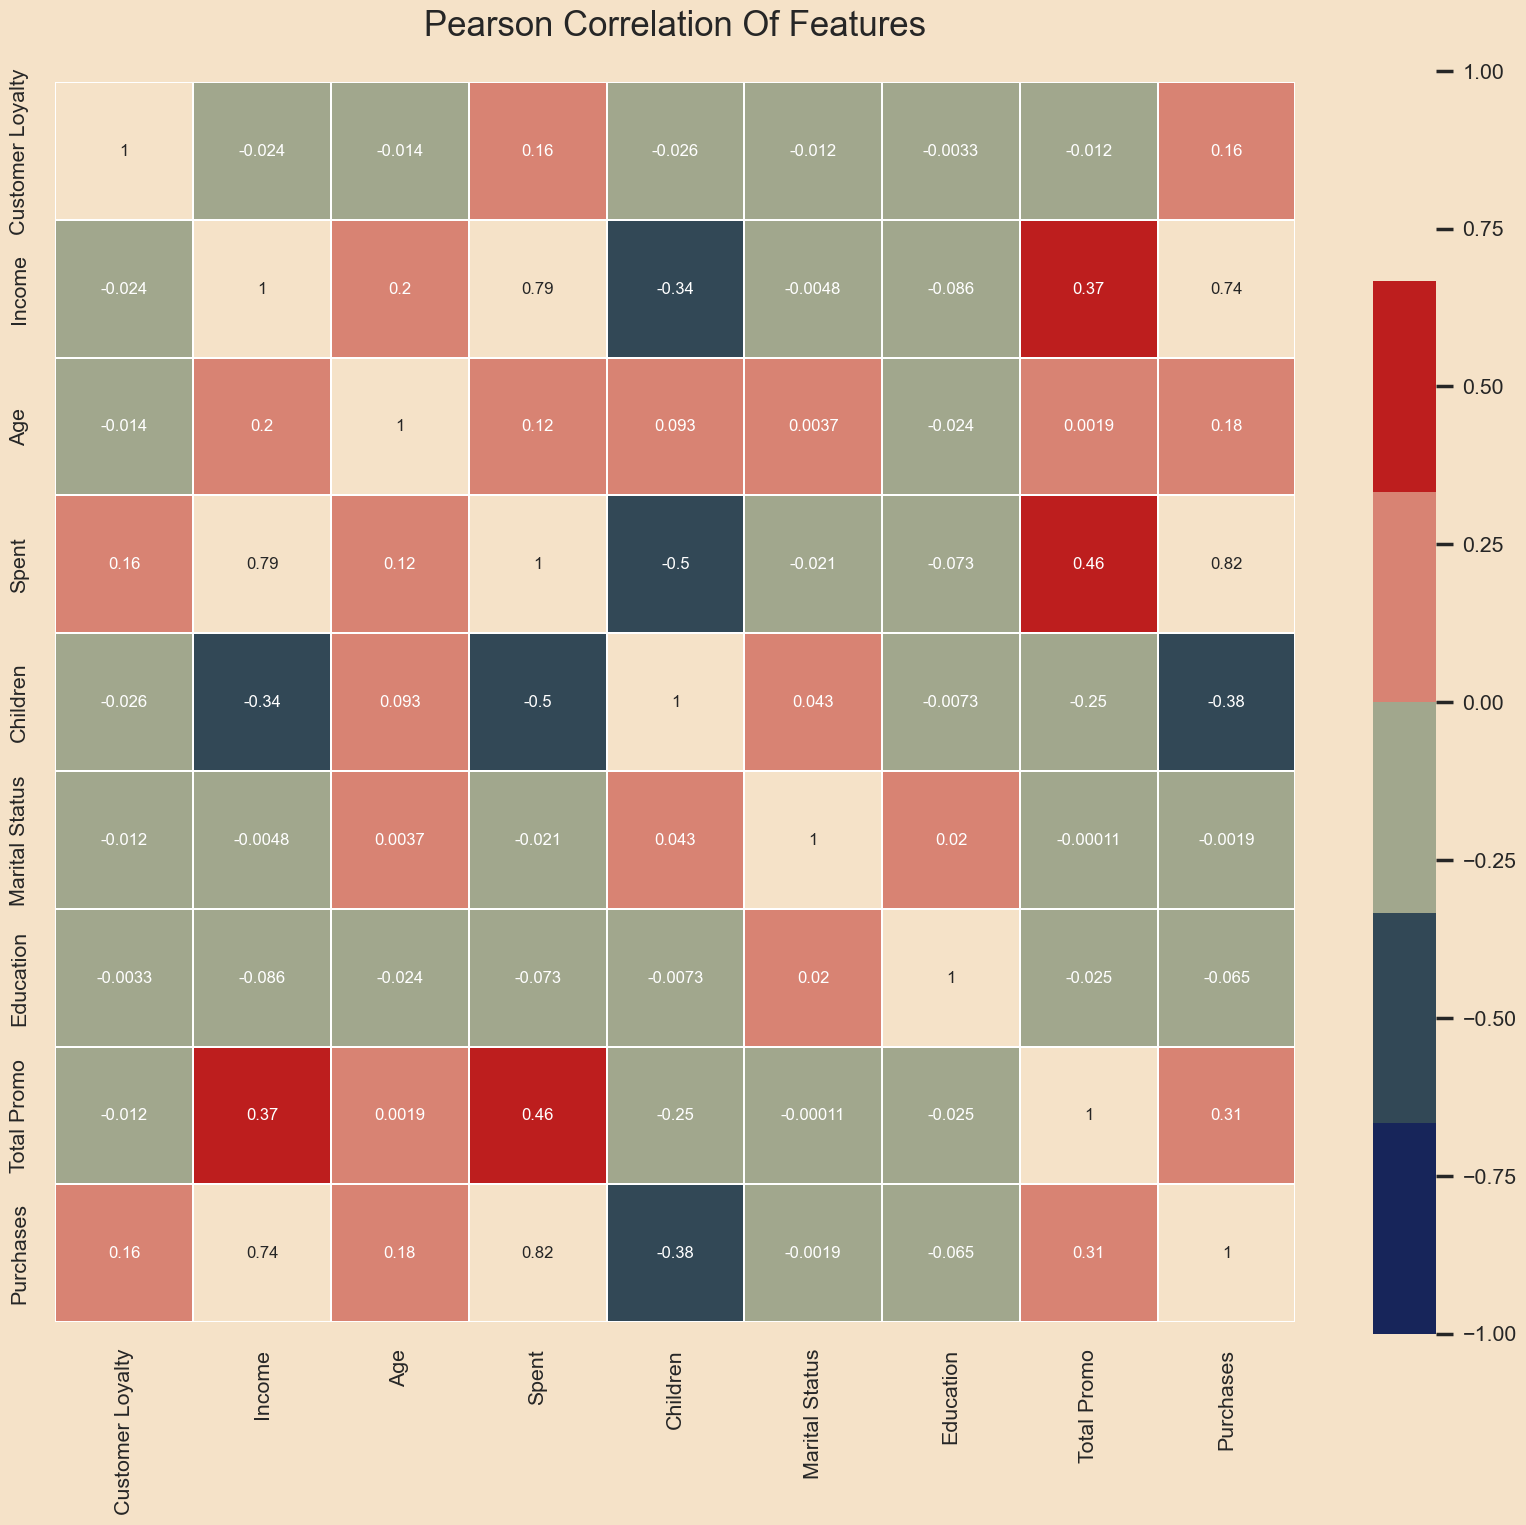

Customer Loyalty  Customer Loyalty    1.000000
Spent             Purchases           0.823361
Income            Spent               0.792740
Purchases         Income              0.742691
Total Promo       Spent               0.456456
Income            Total Promo         0.365986
dtype: float64
Income       Education   -0.086253
Total Promo  Children    -0.245440
Children     Income      -0.343529
Purchases    Children    -0.382854
Children     Spent       -0.499931
dtype: float64


In [459]:
catcol = ["Education", "Marital Status"]
le = LabelEncoder()
for col in catcol:
    new_df[col] = le.fit_transform(new_df[col])


plt.subplots(figsize=(20, 20))

sns.heatmap(
    new_df.corr(),
    cmap=palette_cmap,
    square=True,
    cbar_kws=dict(shrink=0.82),
    annot=True,
    vmin=-1,
    vmax=1,
    linewidths=0.1,
    linecolor="white",
    annot_kws=dict(fontsize=12),
)
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

top_correlations = (
    new_df.corr().unstack().sort_values(ascending=False).drop_duplicates()
)
top_5_correlations = top_correlations.head(6)
print(top_5_correlations)
print(top_correlations.tail(5))

In [460]:
dataC = new_df.copy()
scaler = StandardScaler()
dataC = scaler.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns=new_df.columns)
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

After scaling, let's have a glimpse of the scaled dataset :


,Customer Loyalty,Income,Age,Spent,Children,Marital Status,Education,Total Promo,Purchases
0,1.527721,0.287105,1.018352,1.676245,-1.264598,-1.349603,-0.893586,-0.439160,1.309461
1,-1.189011,-0.260882,1.274785,-0.963297,1.404572,-1.349603,-0.893586,-0.439160,-1.189221
2,-0.206048,0.913196,0.334530,0.280110,-1.264598,0.740959,-0.893586,-0.439160,1.031830
3,-1.060584,-1.176114,-1.289547,-0.920135,0.069987,0.740959,-0.893586,-0.439160,-0.911590
4,-0.951915,0.294307,-1.033114,-0.307562,0.069987,0.740959,0.571657,-0.439160,0.198936


In [461]:
scaled_dataC = scaled_data.copy()
pca = PCA(n_components=2, random_state=42)
scaled_dataC = pca.fit_transform(scaled_dataC)
pca_data = pd.DataFrame(scaled_dataC, columns=["col1", "col2"])

print("Let's have a glimpse of the PCA transformed dataset :")
pca_data.head(15).T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

Let's have a glimpse of the PCA transformed dataset :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
col1,2.258295,-1.720151,1.452359,-1.855219,-0.300004,0.644762,0.357088,-1.448965,-1.750819,-2.463010,-1.848782,1.249845,-0.642503,-1.622498,3.657192
col2,-0.343582,-1.762620,-0.411342,0.689403,0.578415,-0.396729,0.026520,1.247858,0.541618,-1.323121,1.948312,-0.420603,-1.620389,1.845082,-0.432186


Let's have a look on the dataset after dimensionality reduction :


<Axes: xlabel='col1', ylabel='col2'>

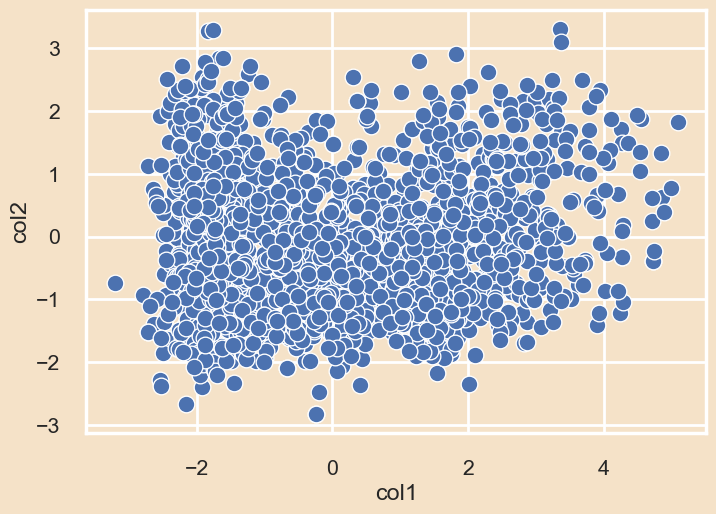

In [462]:
x = pca_data["col1"]
y = pca_data["col2"]

print(f"Let's have a look on the dataset after dimensionality reduction :")

sns.scatterplot(data=pca_data, x="col1", y="col2", palette=cluster[0])

Elbow Method for determining the number of clusters :


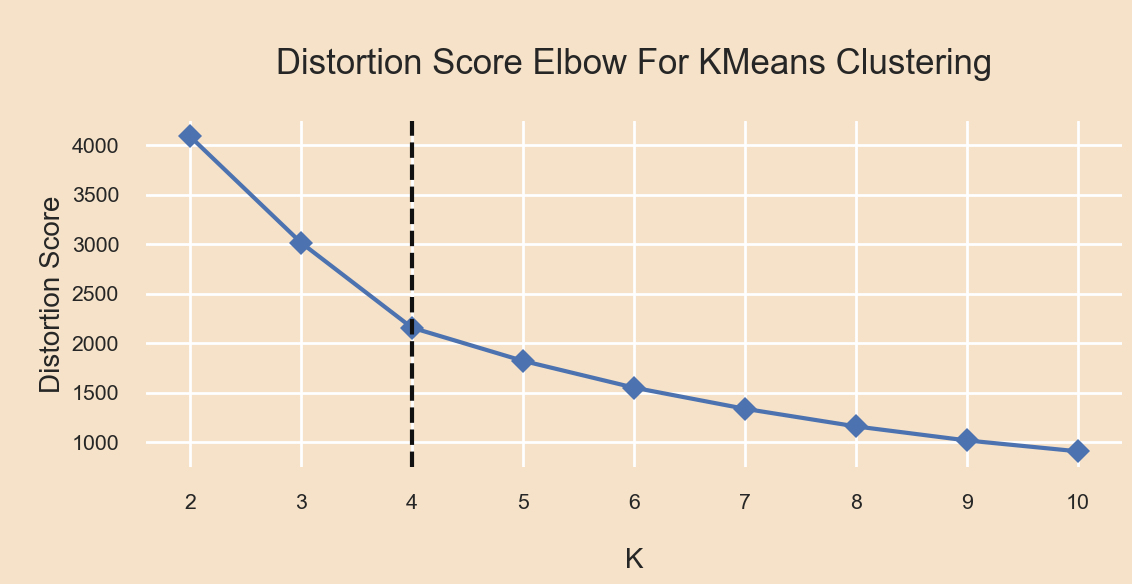

In [463]:
print("Elbow Method for determining the number of clusters :")
_, axes = plt.subplots(figsize=(20, 8))

elbow = KElbowVisualizer(
    KMeans(), k=10, timings=False, locate_elbow=True, size=(1260, 450)
)
elbow.fit(pca_data)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n", fontsize=25)
axes.set_xlabel("\nK", fontsize=20)
axes.set_ylabel("\nDistortion Score", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

In [464]:
km = KMeans(n_clusters=4, random_state=42)
# ac = AgglomerativeClustering(n_clusters=4)

y_km = km.fit_predict(pca_data)
pca_data["Clusters"] = y_km
new_df["Clusters"] = y_km

new_df.head(15).T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

,0,1,2,3,4,5,6,7,8,9,11,12,13,14,15
Customer Loyalty,663.000000,113.000000,312.000000,139.000000,161.000000,293.000000,593.000000,417.000000,388.000000,108.000000,593.000000,226.000000,226.000000,627.000000,582.000000
Income,58138.000000,46344.000000,71613.000000,26646.000000,58293.000000,62513.000000,55635.000000,33454.000000,30351.000000,5648.000000,7500.000000,63033.000000,59354.000000,17323.000000,82800.000000
Age,67.000000,70.000000,59.000000,40.000000,43.000000,57.000000,53.000000,39.000000,50.000000,74.000000,48.000000,65.000000,72.000000,37.000000,78.000000
Spent,1617.000000,27.000000,776.000000,53.000000,422.000000,716.000000,590.000000,169.000000,46.000000,49.000000,61.000000,1102.000000,310.000000,46.000000,1315.000000
Children,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
Marital Status,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
Education,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000
Total Promo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
Purchases,22.000000,4.000000,20.000000,6.000000,14.000000,20.000000,17.000000,8.000000,5.000000,1.000000,5.000000,15.000000,12.000000,4.000000,25.000000
Clusters,2.000000,0.000000,1.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,0.000000,3.000000,1.000000,0.000000,3.000000,2.000000


Let's have a look on the customers quantity distribution after clustering :


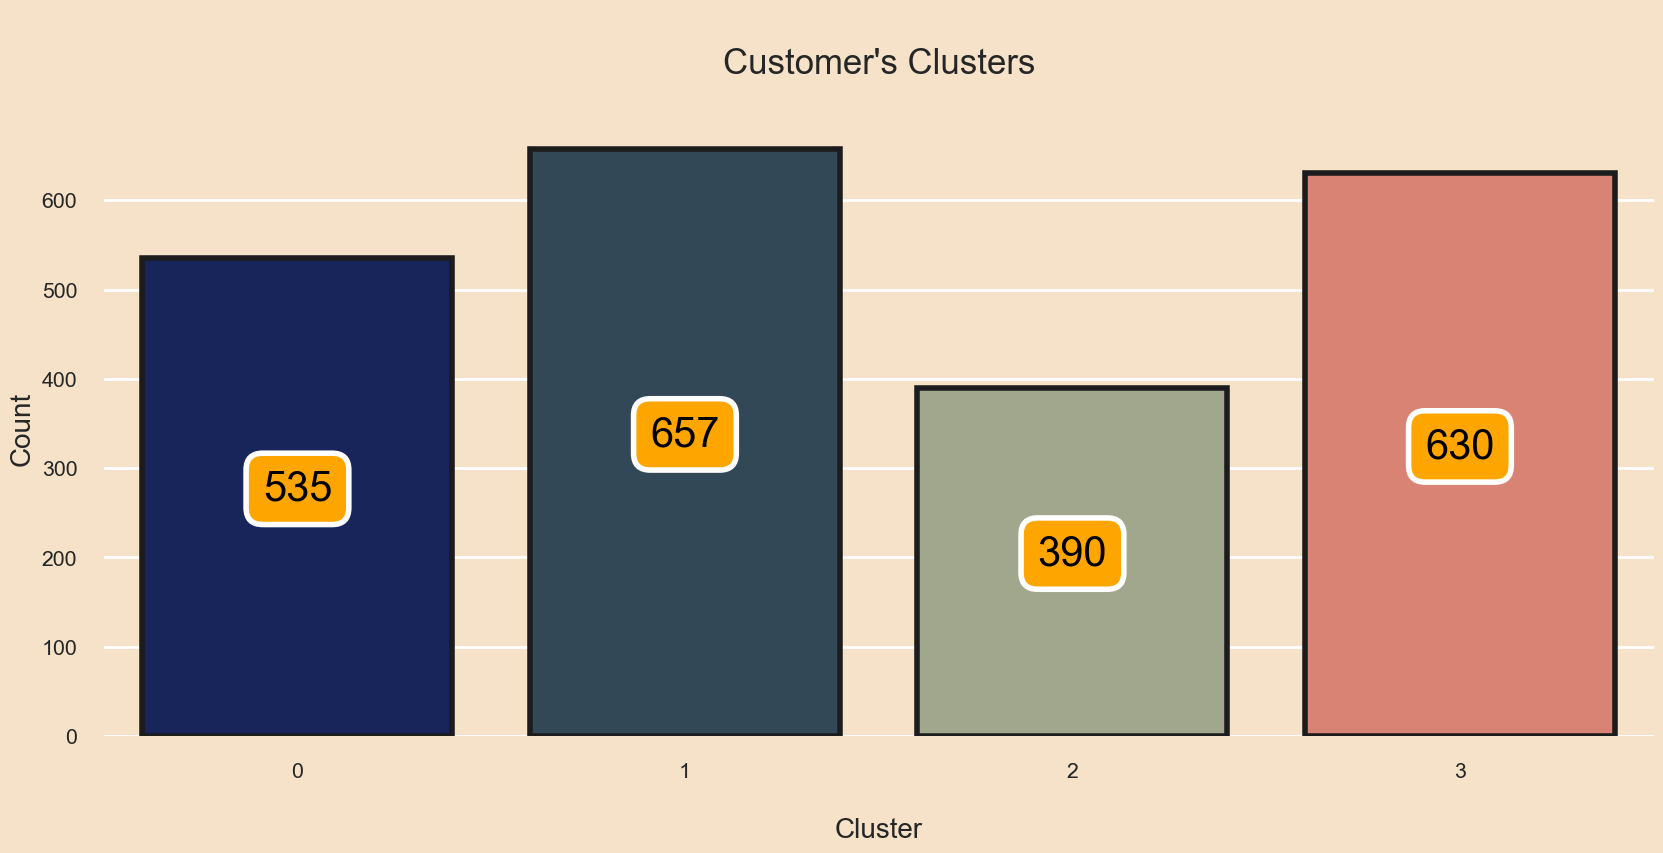

In [465]:
print("Let's have a look on the customers quantity distribution after clustering :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(
    x=new_df["Clusters"],
    palette=cluster,
    saturation=1,
    edgecolor="#1c1c1c",
    linewidth=4,
)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Clusters\n", fontsize=25)
p.axes.set_ylabel("Count", fontsize=20)
p.axes.set_xlabel("\nCluster", fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation=0)
for container in p.containers:
    p.bar_label(
        container,
        label_type="center",
        padding=6,
        size=30,
        color="black",
        rotation=0,
        bbox={
            "boxstyle": "round",
            "pad": 0.4,
            "facecolor": "orange",
            "edgecolor": "white",
            "linewidth": 4,
            "alpha": 1,
        },
    )


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the dataset after clustering :


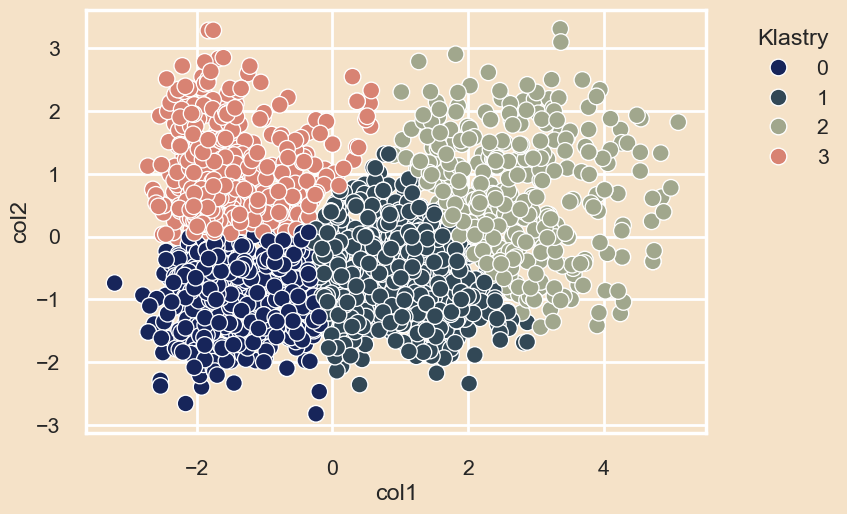

In [466]:
print(f"Let's have a look on the dataset after clustering :")

sns.scatterplot(data=pca_data, x="col1", y="col2", palette=cluster, hue="Clusters")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title='Klastry')

plt.show()

Let's have a look on the characteristics of the clusters on the basis of income and spending :


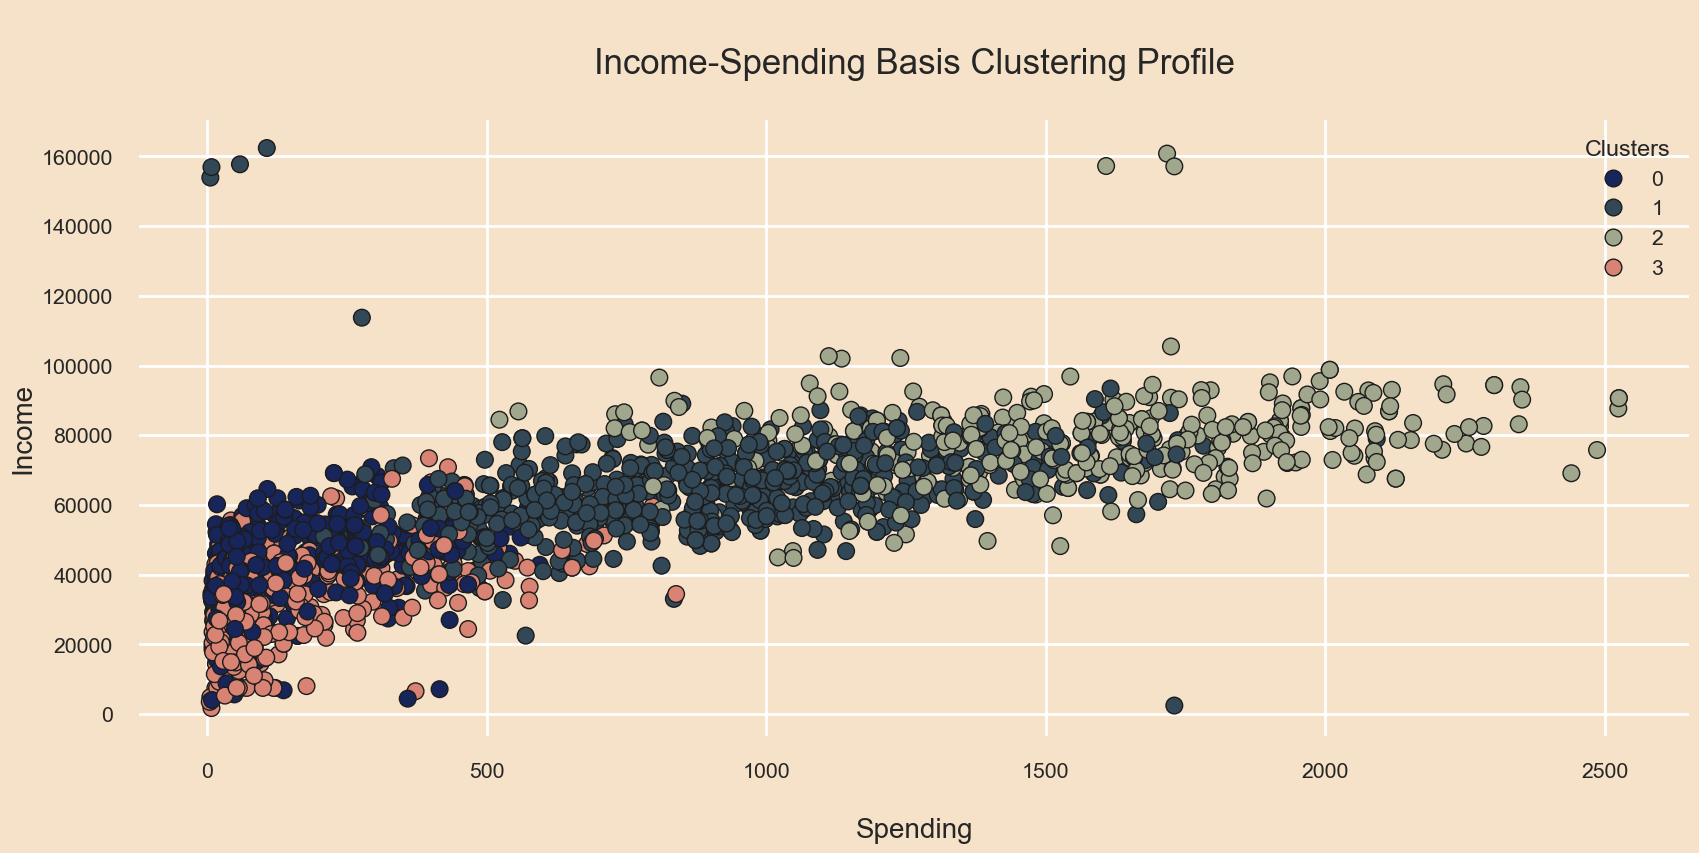

In [467]:
print(
    f"Let's have a look on the characteristics of the clusters on the basis of income and spending :"
)

_, axes = plt.subplots(figsize=(20, 8))
sns.scatterplot(
    x=new_df["Spent"],
    y=new_df["Income"],
    hue=new_df["Clusters"],
    palette=cluster,
    sizes=60,
    alpha=1,
    edgecolor="#1c1c1c",
    linewidth=1,
)
axes.set_title("\nIncome-Spending Basis Clustering Profile\n", fontsize=25)
axes.set_ylabel("Income", fontsize=20)
axes.set_xlabel("\nSpending", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the characteristics of the clusters on the basis of spending :


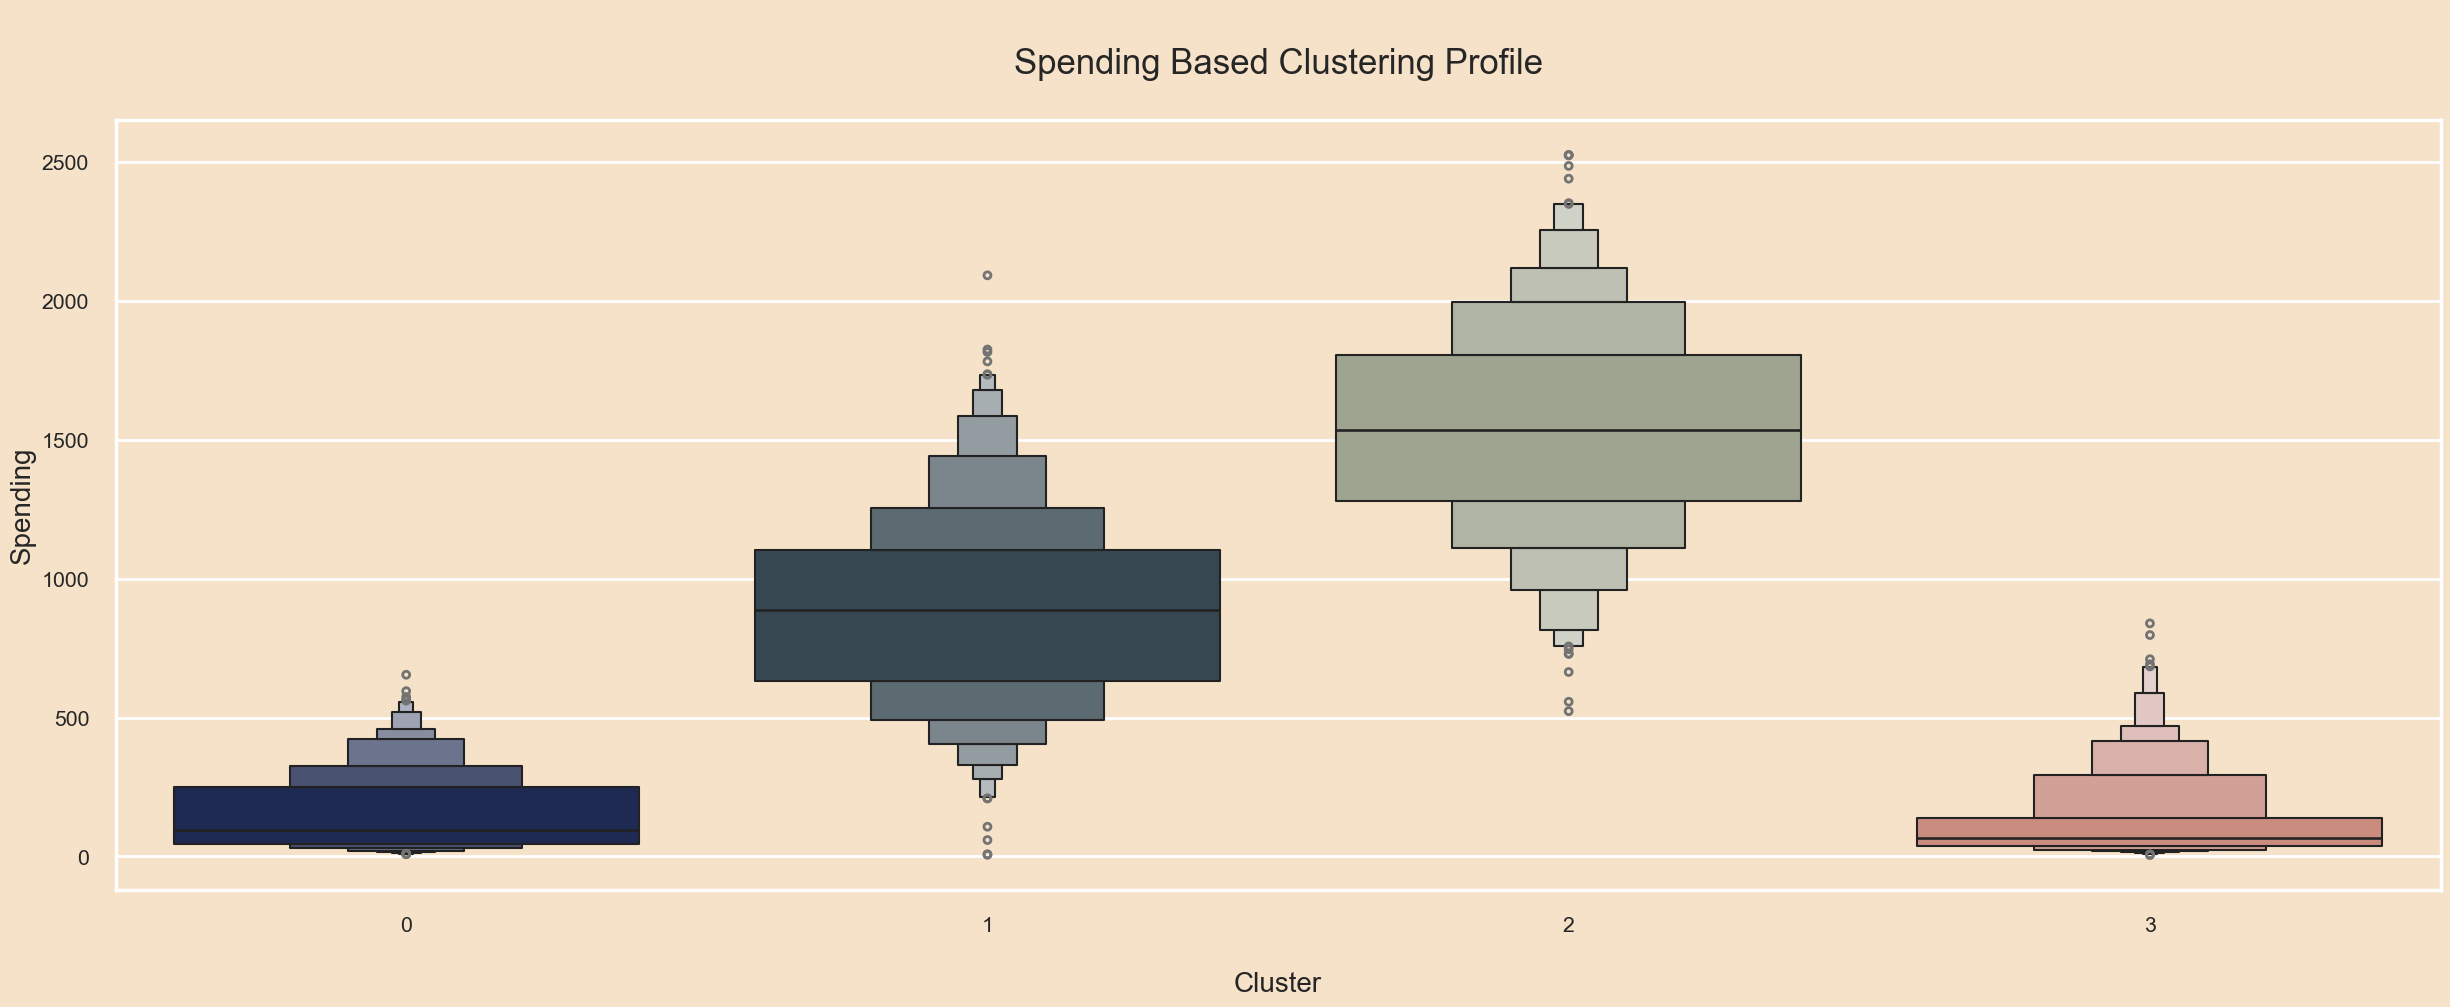

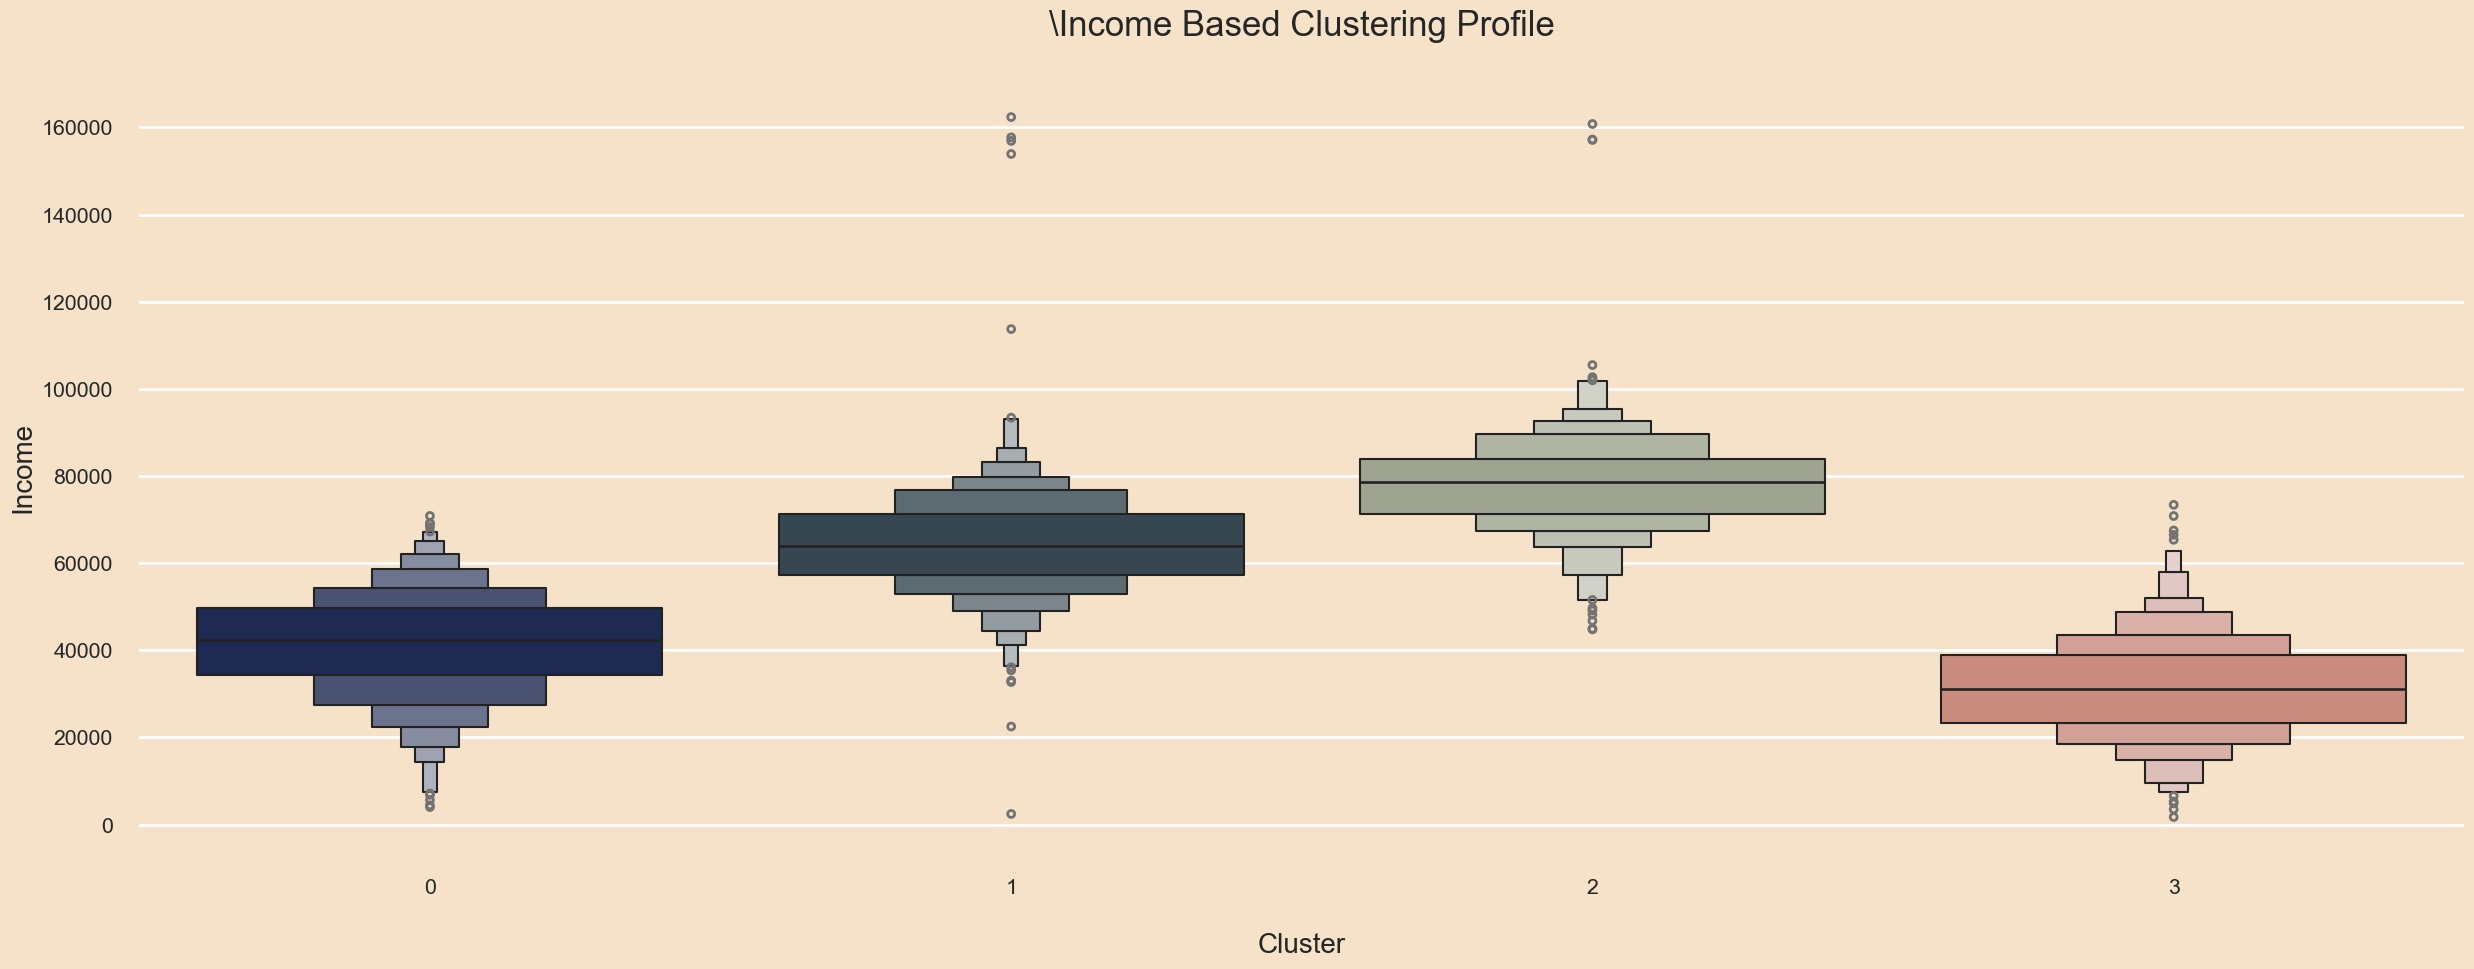

In [468]:
print(
    f"Let's have a look on the characteristics of the clusters on the basis of spending :"
)

_, axes = plt.subplots(figsize=(30, 10))
sns.boxenplot(x=new_df["Clusters"], y=new_df["Spent"], palette=cluster)

axes.set_title("\nSpending Based Clustering Profile\n", fontsize=25)
axes.set_ylabel("Spending", fontsize=20)
axes.set_xlabel("\nCluster", fontsize=20)

_, axes = plt.subplots(figsize=(30, 10))
sns.boxenplot(x=new_df["Clusters"], y=new_df["Income"], palette=cluster)

axes.set_title("\Income Based Clustering Profile\n", fontsize=25)
axes.set_ylabel("Income", fontsize=20)
axes.set_xlabel("\nCluster", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the characteristics of the clusters on the basis of accepting promotions :


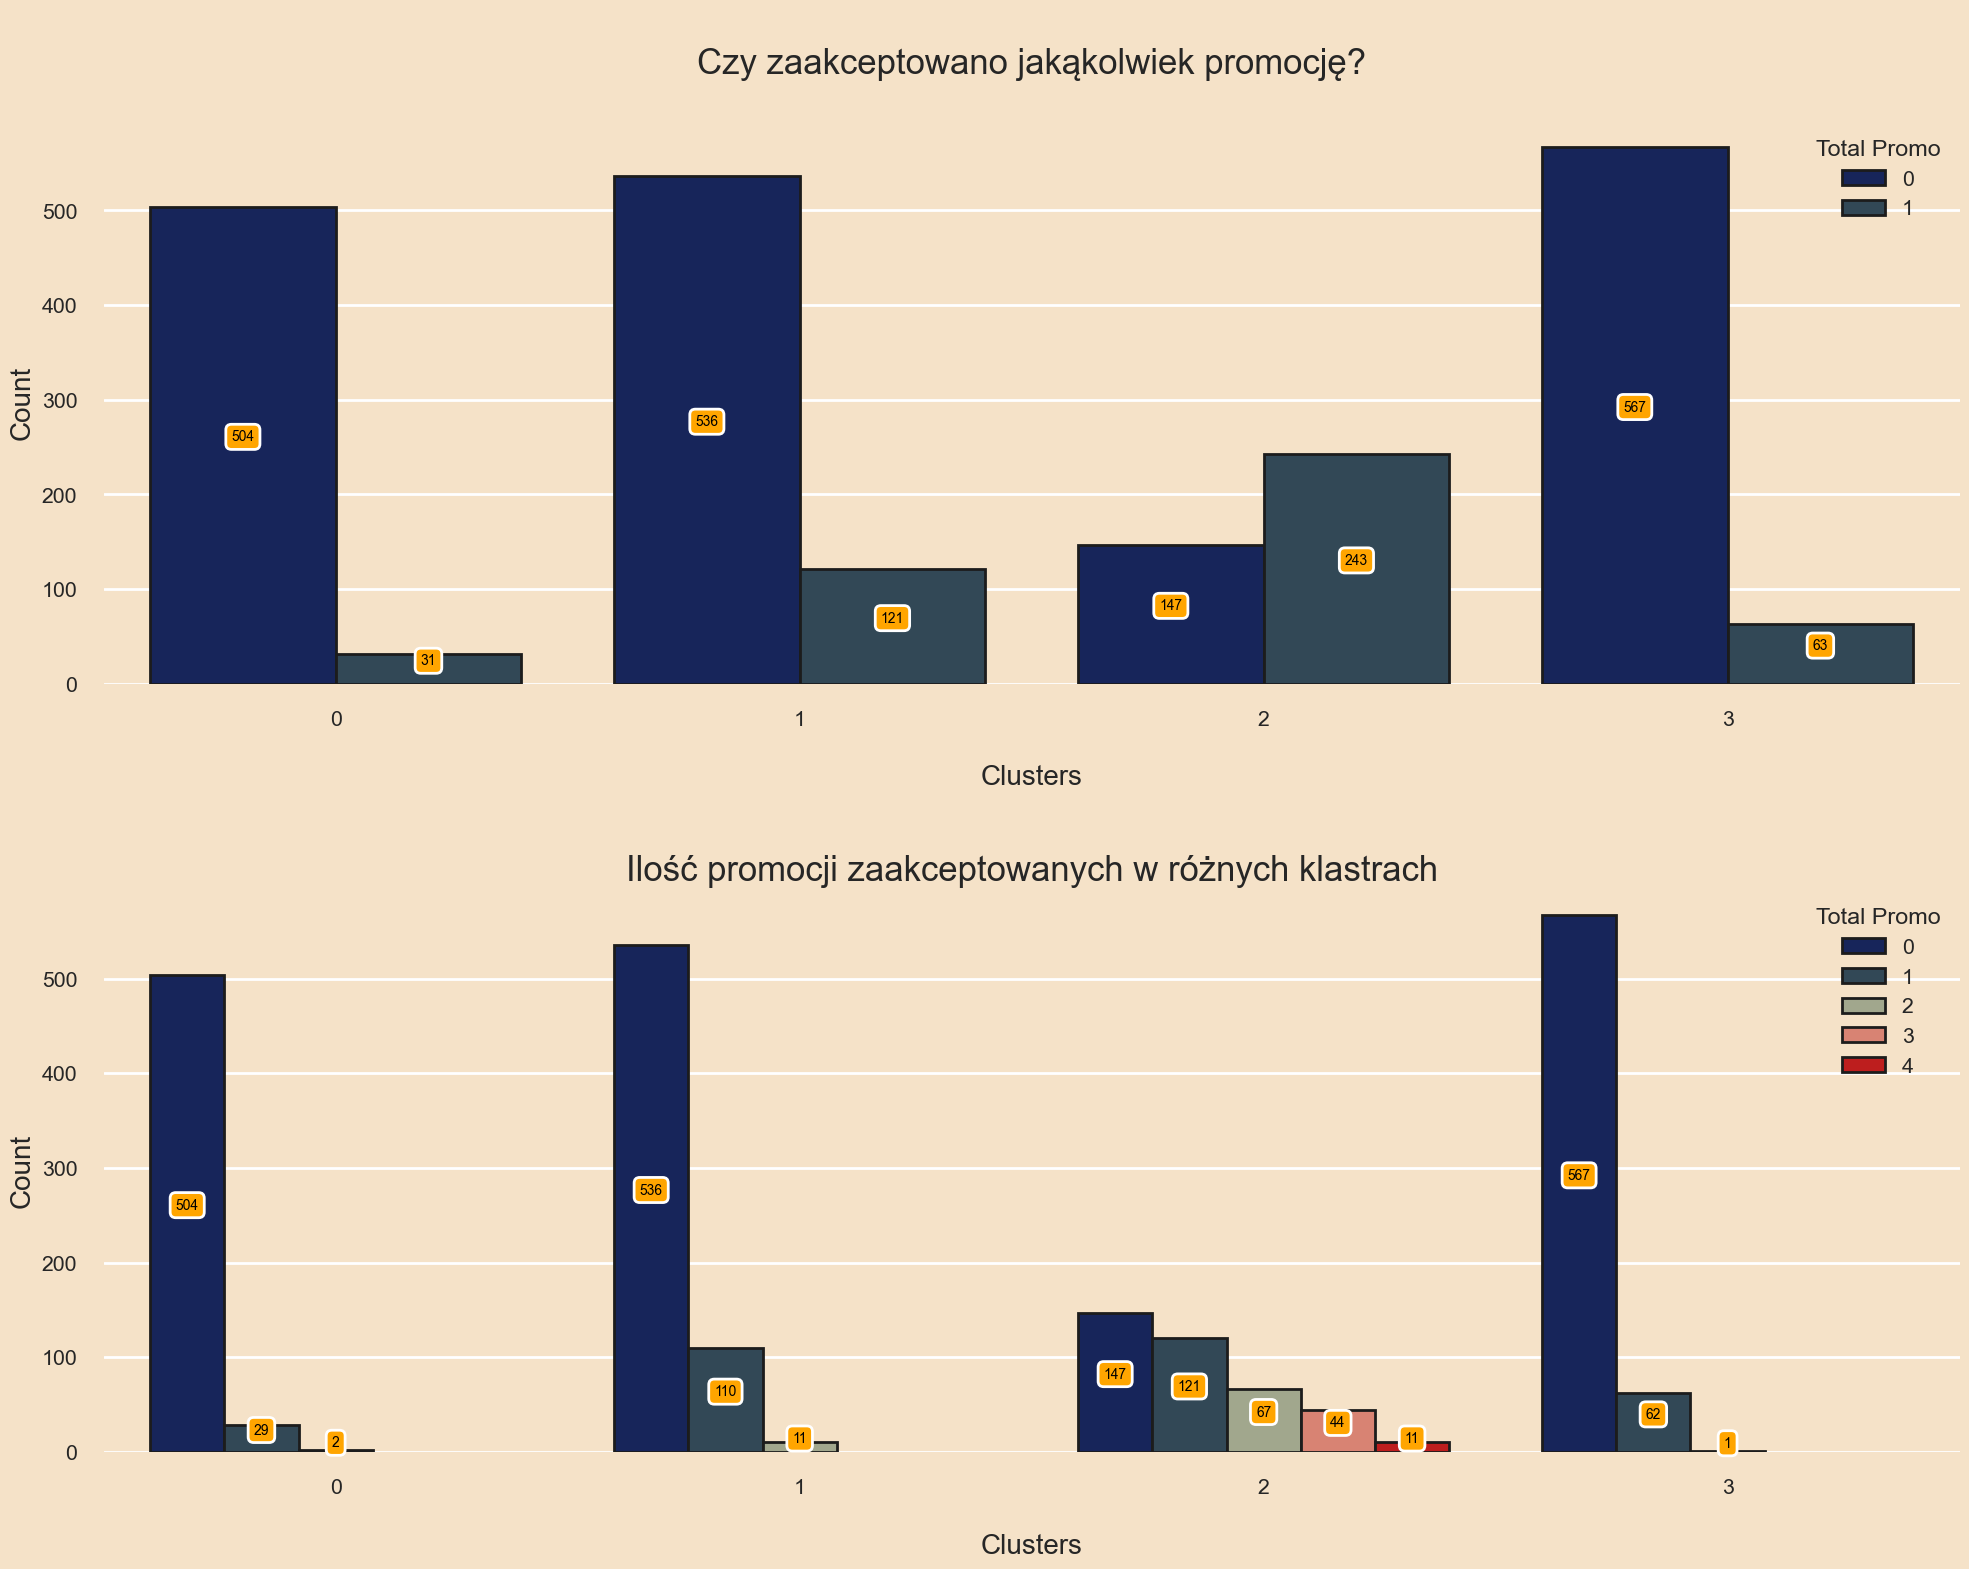

In [469]:
print(
    f"Let's have a look on the characteristics of the clusters on the basis of accepting promotions :"
)

fig, axes = plt.subplots(2, 1, figsize=(20, 16), sharex=False, sharey=False)
# plt.subplots(figsize=(20, 8))
total_promo_bnary = new_df["Total Promo"].apply(lambda x: 0 if x == 0 else 1)
axes[0] = sns.countplot(
    x=new_df["Clusters"],
    hue=total_promo_bnary,
    palette=cluster,
    saturation=1,
    edgecolor="#1c1c1c",
    linewidth=2,
    ax=axes[0],
)

axes[0].set_yscale("linear")
axes[0].set_title("\nCzy zaakceptowano jakąkolwiek promocję?\n", fontsize=25)
axes[0].set_ylabel("Count", fontsize=20)
axes[0].set_xlabel("\nClusters", fontsize=20)
axes[0].set_xticklabels(p.get_xticklabels(), rotation=0)

axes[1] = sns.countplot(
    x=new_df["Clusters"],
    hue=new_df["Total Promo"],
    palette=cluster,
    saturation=1,
    edgecolor="#1c1c1c",
    linewidth=2,
    ax=axes[1],
)
axes[1].set_yscale("linear")
axes[1].set_title("\nIlość promocji zaakceptowanych w różnych klastrach", fontsize=25)
axes[1].set_ylabel("Count", fontsize=20)
axes[1].set_xlabel("\nClusters", fontsize=20)
axes[1].set_xticklabels(p.get_xticklabels(), rotation=0)
for container in axes[0].containers:
    axes[0].bar_label(
        container,
        label_type="center",
        padding=6,
        size=10,
        color="black",
        rotation=0,
        bbox={
            "boxstyle": "round",
            "pad": 0.4,
            "facecolor": "orange",
            "edgecolor": "white",
            "linewidth": 2,
            "alpha": 1,
        },
    )
for container in axes[1].containers:
    axes[1].bar_label(
        container,
        label_type="center",
        padding=6,
        size=10,
        color="black",
        rotation=0,
        bbox={
            "boxstyle": "round",
            "pad": 0.4,
            "facecolor": "orange",
            "edgecolor": "white",
            "linewidth": 2,
            "alpha": 1,
        },
    )
plt.tight_layout()

sns.despine(left=True, bottom=True)
plt.show()

In [470]:
def cluster_f(feature):

    _, axes = plt.subplots(figsize=(20, 8))
    p = sns.countplot(
        x=new_df[feature],
        hue=new_df["Clusters"],
        palette=cluster,
        saturation=1,
        edgecolor="#1c1c1c",
        linewidth=2,
    )
    axes.set_title(f"\nClustering Profile On {feature}\n", fontsize=25)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title='Klaster')
    # axes.set_ylabel("Spending", fontsize=20)
    axes.set_xlabel(f"\n{feature}", fontsize=20)

    sns.despine(left=True, bottom=True)
    plt.show()

In [471]:
def cluster_odwrotnie(feature,title):
    
    _, axes = plt.subplots(figsize=(20, 8))
    p = sns.countplot(
        x=new_df['Clusters'],
        hue=new_df[feature],
        palette=palette_cmap,
        saturation=1,
        edgecolor="#1c1c1c",
        linewidth=2,
    )
    axes.set_title(f"\nClustering Profile On {feature}\n", fontsize=25)
    # axes.set_ylabel("Spending", fontsize=20)
    axes.set_xlabel(f"\nKlaster", fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title=title)
    sns.despine(left=True, bottom=True)
    plt.show()

Characteristics of clusters based on having childern :


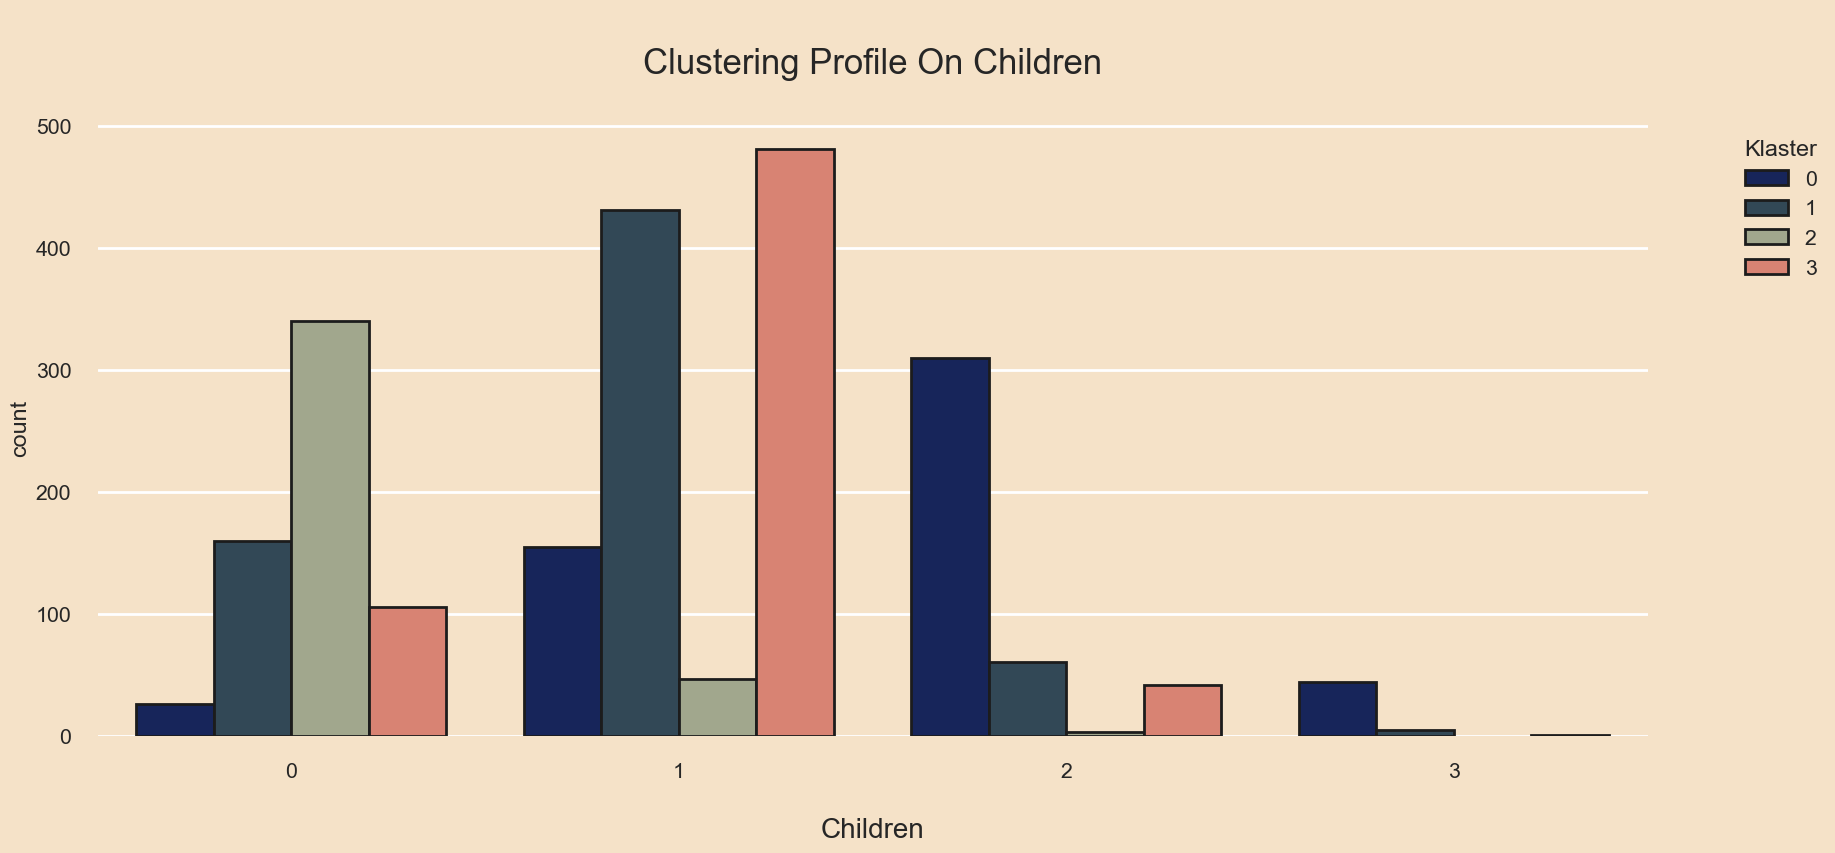

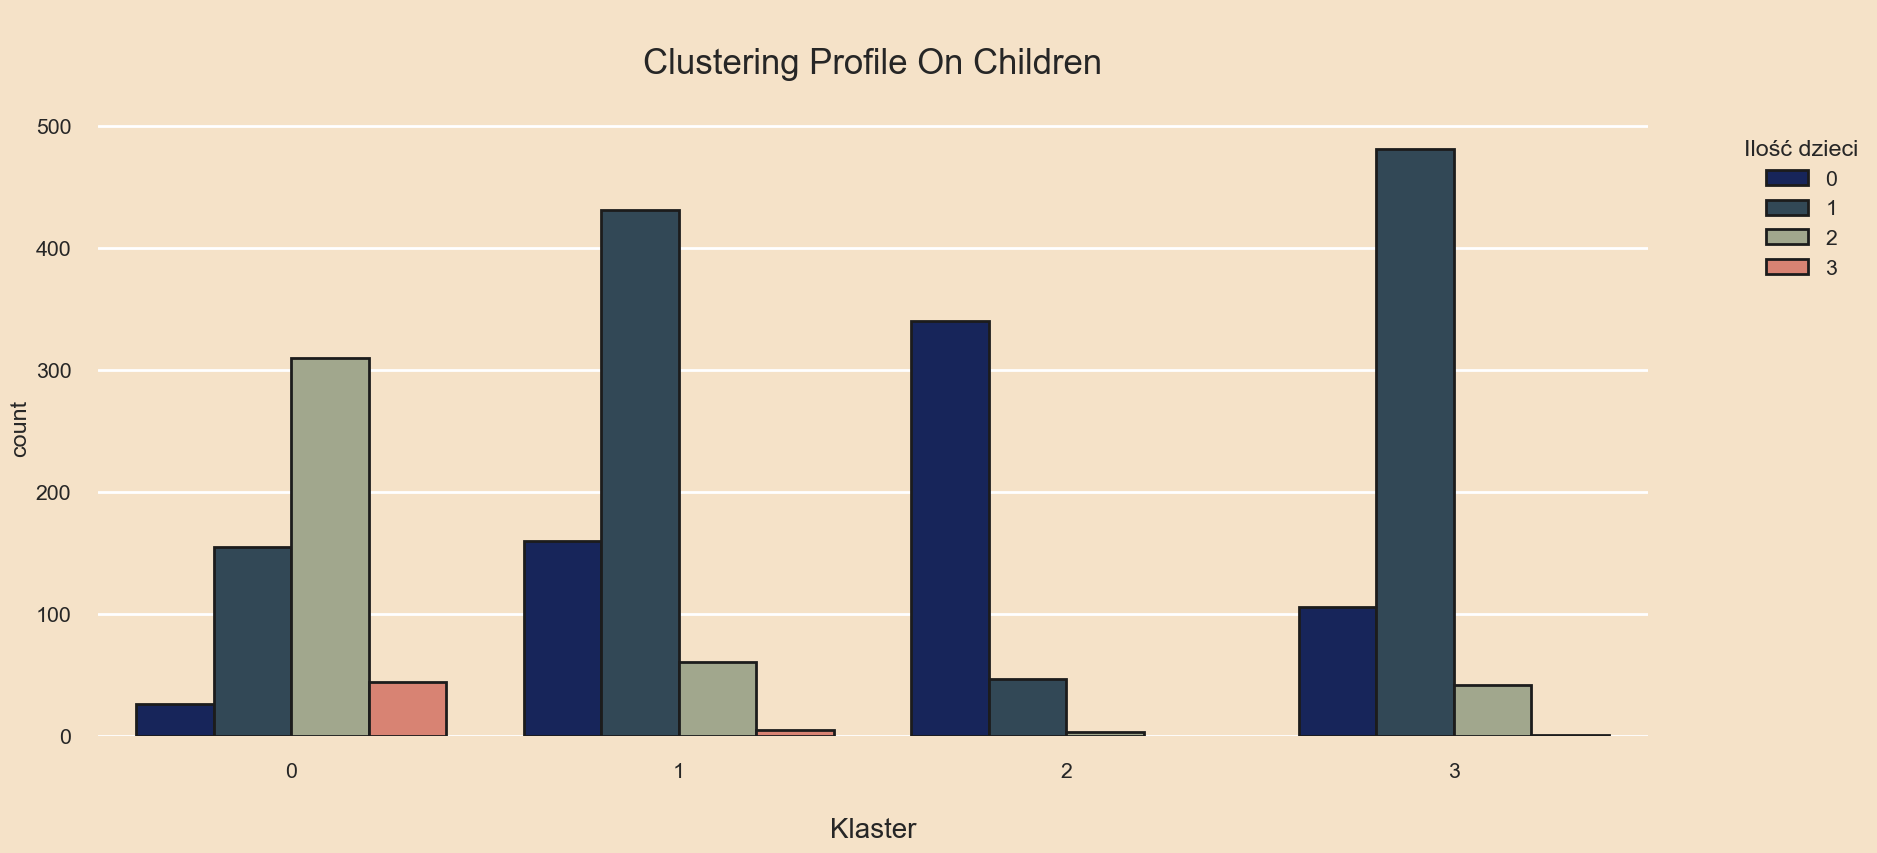

In [472]:
print(f"Characteristics of clusters based on having childern :")
cluster_f("Children")
cluster_odwrotnie("Children", "Ilość dzieci")

Characteristics of clusters based on age :


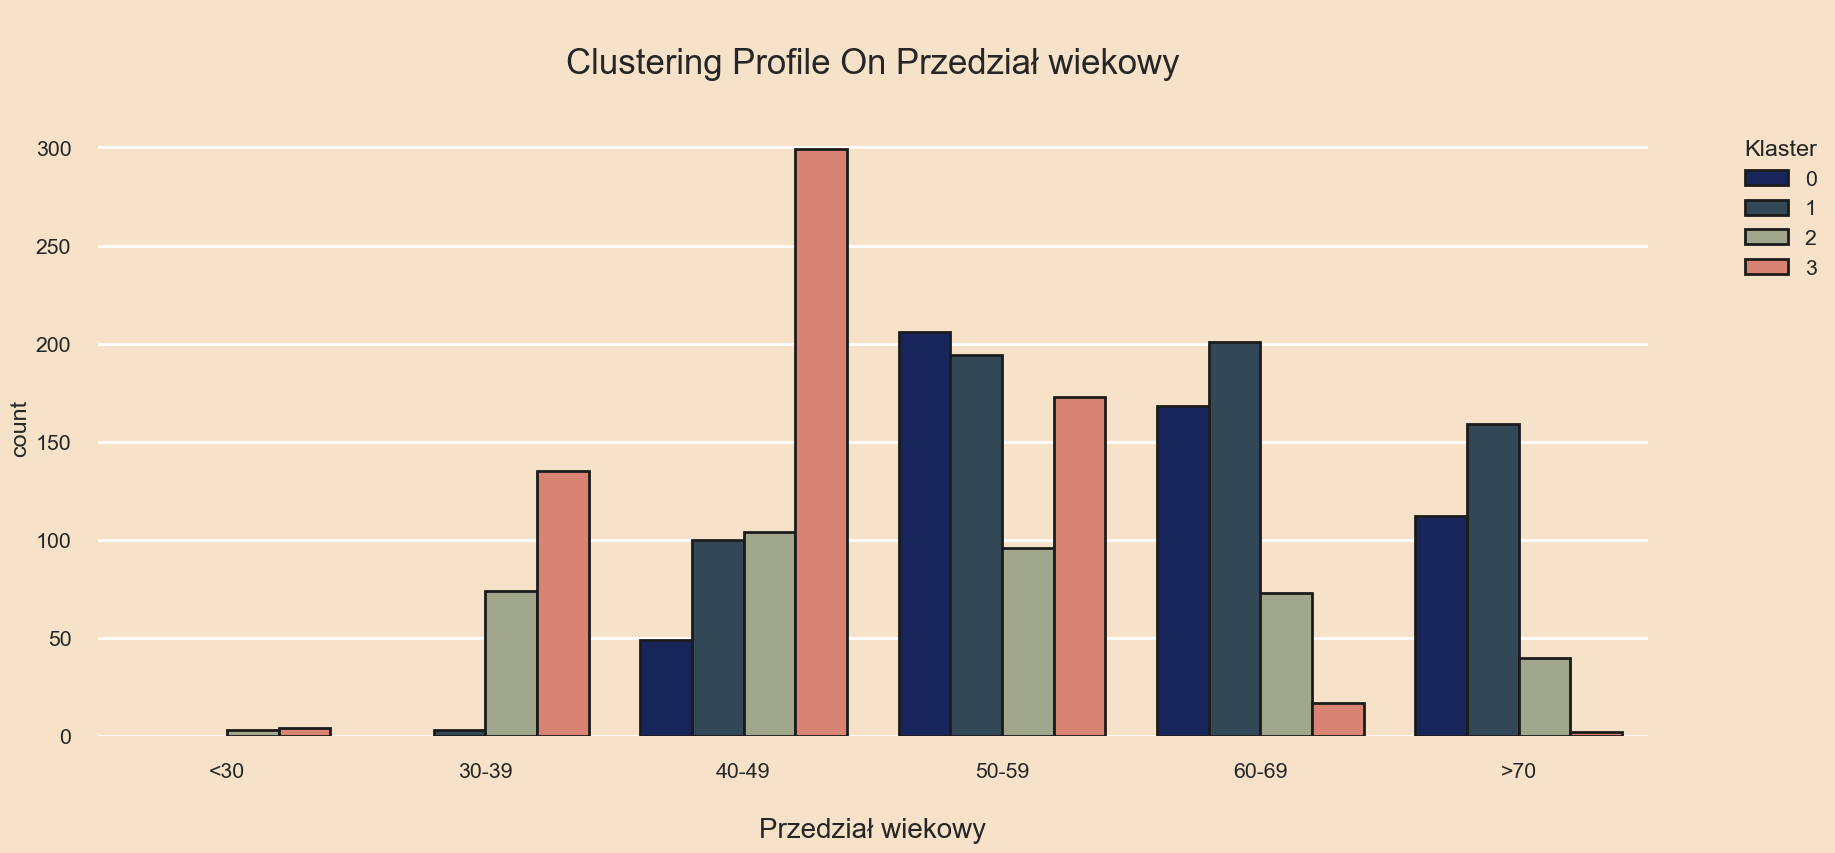

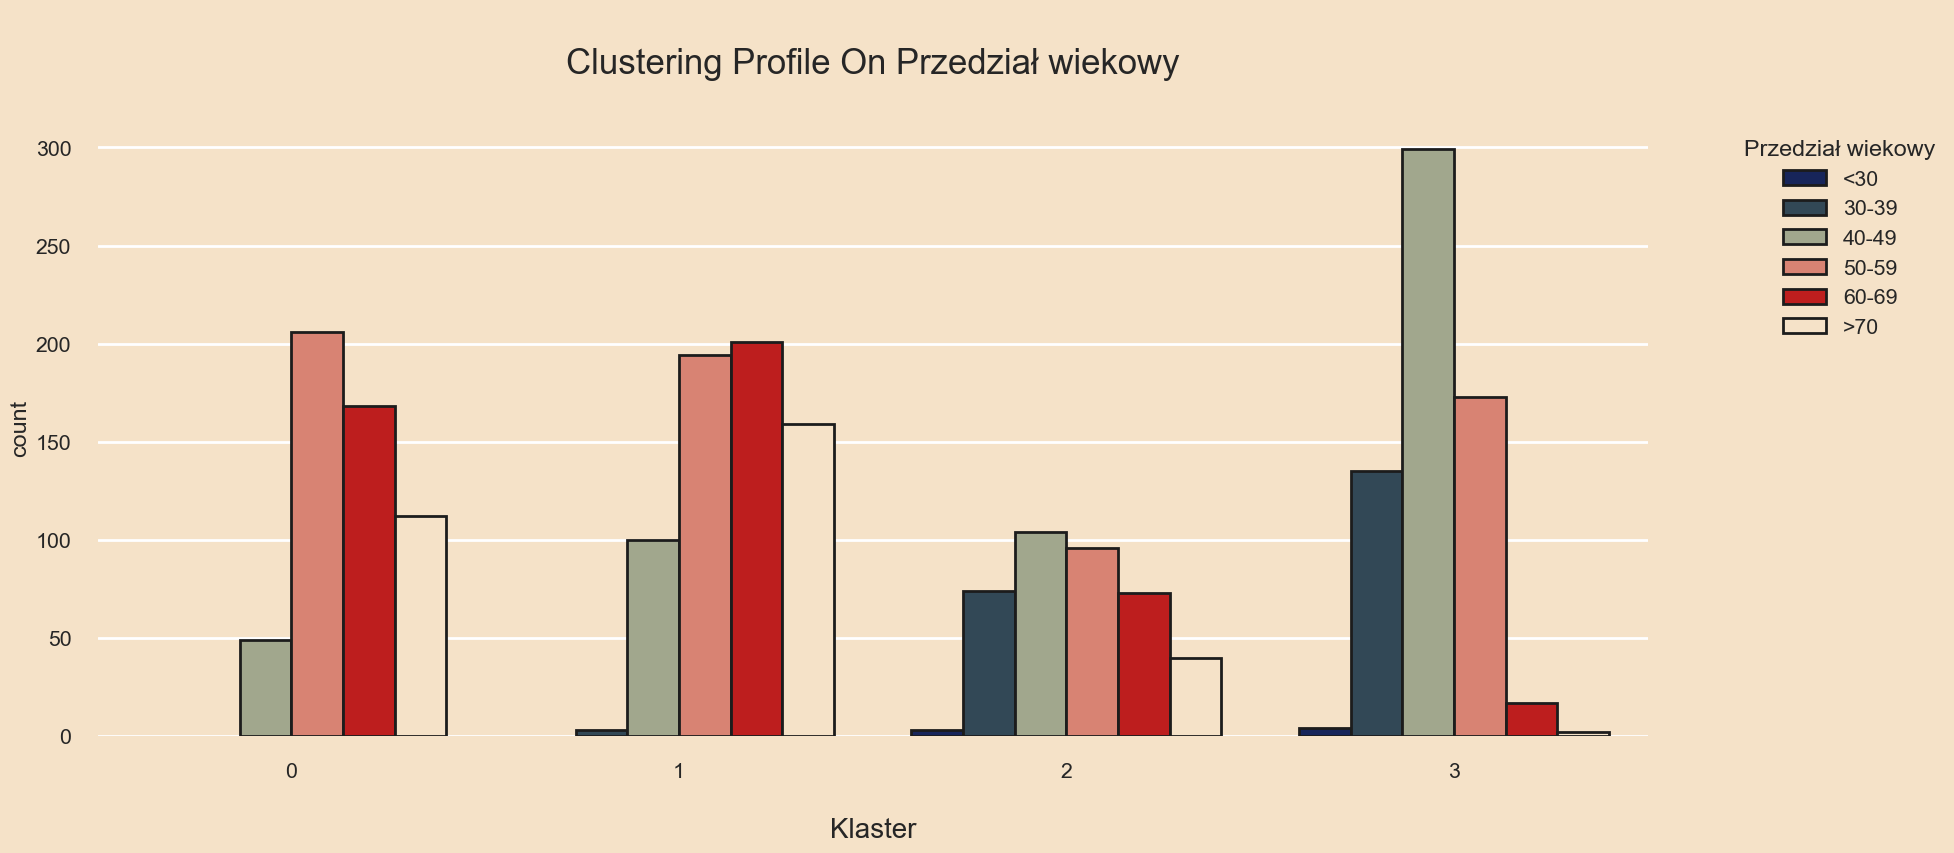

In [473]:
print(f"Characteristics of clusters based on age :")

# Definicja przedziałów wiekowych
bins = [0, 29, 39, 49, 59, 69, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '>70']

# Dodawanie nowej kolumny z podziałem wiekowym
new_df['Przedział wiekowy'] = pd.cut(new_df['Age'], bins=bins, labels=labels)

cluster_f("Przedział wiekowy")
cluster_odwrotnie("Przedział wiekowy", "Przedział wiekowy")


Characteristics of clusters based on education level :


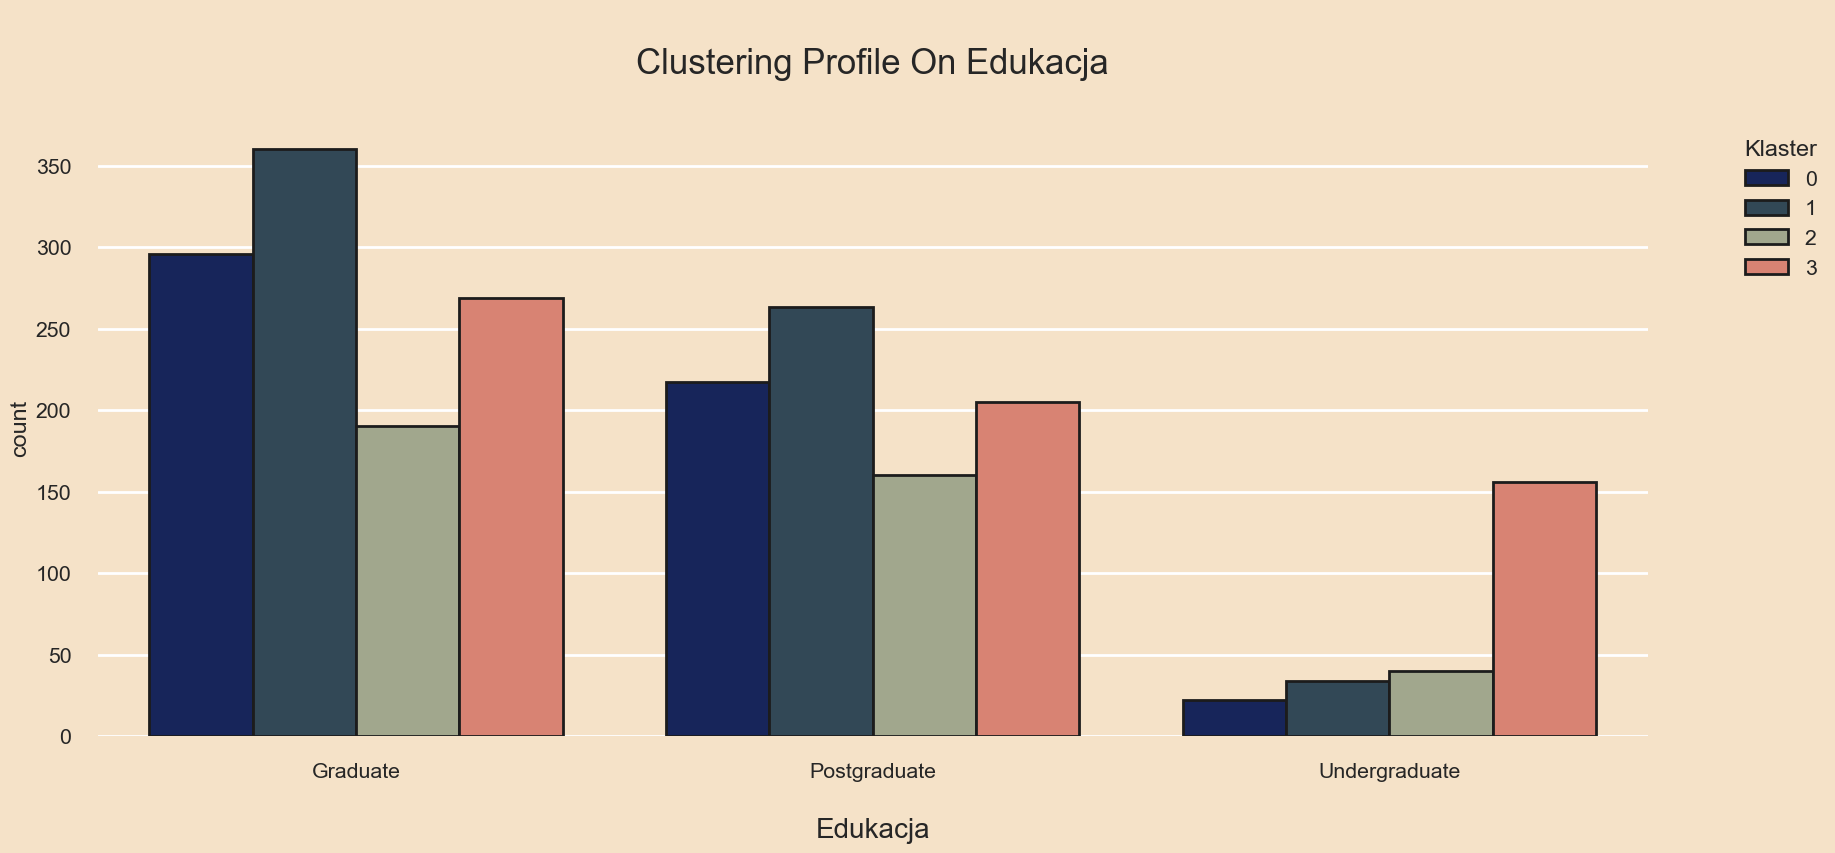

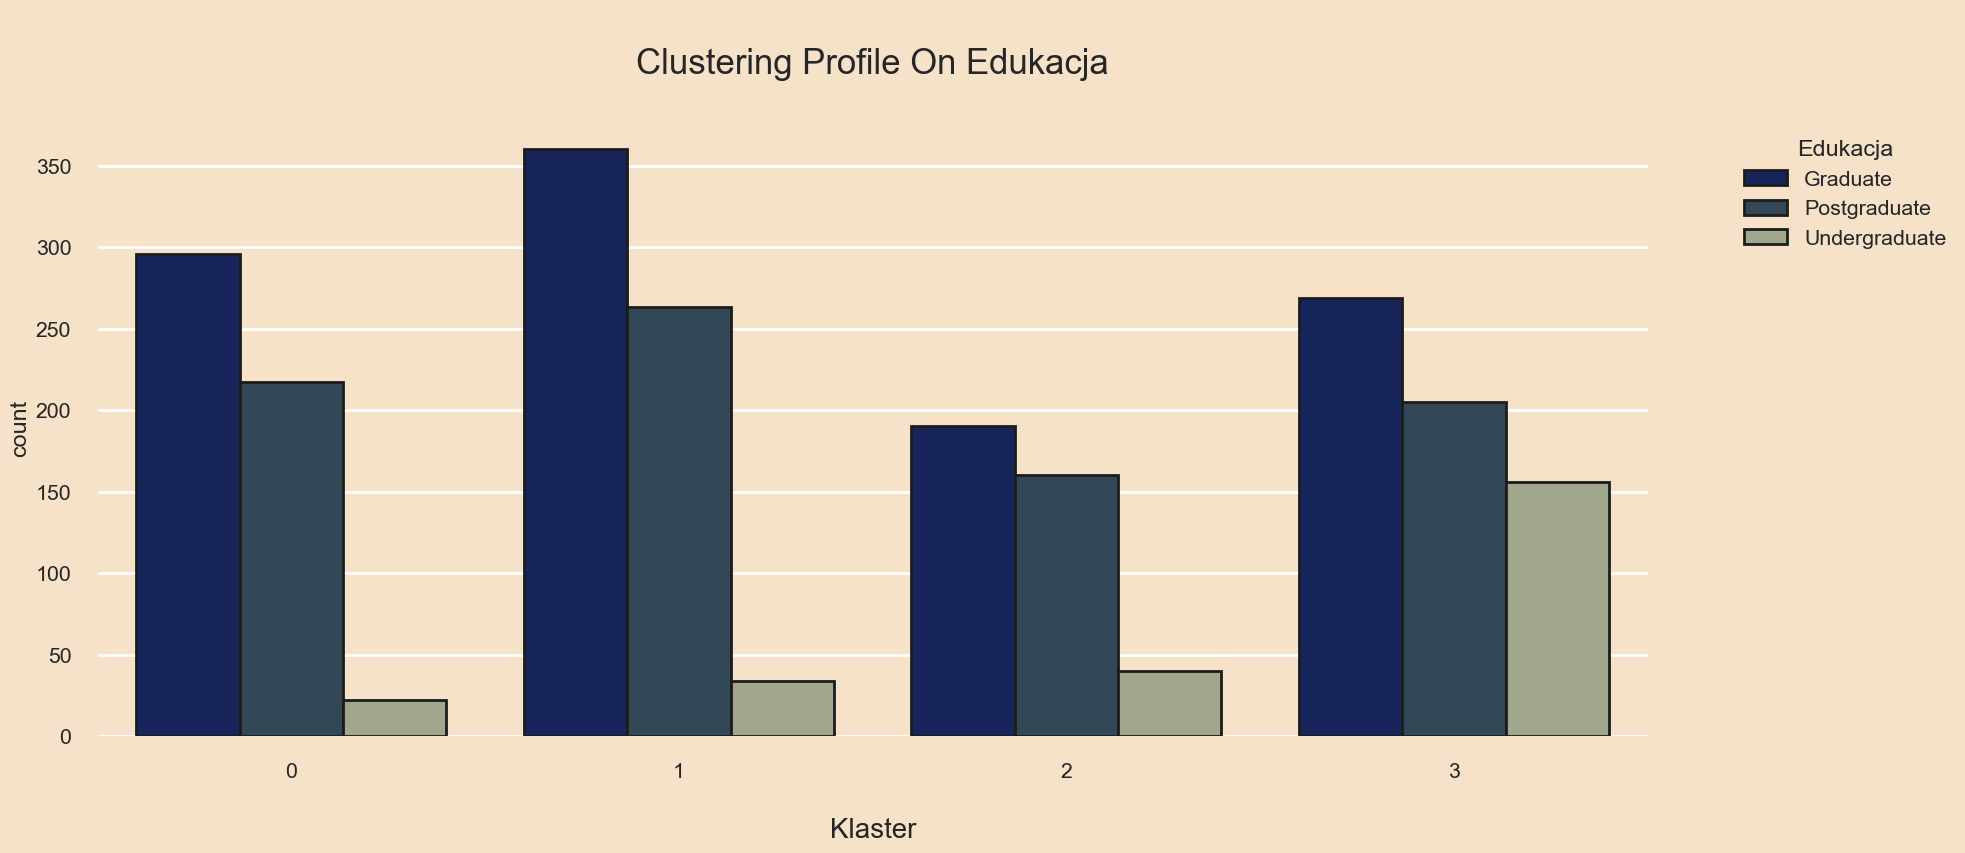

In [474]:
print(f"Characteristics of clusters based on education level :")

mapowanie_edukacji = {0: 'Graduate', 1: 'Postgraduate', 2: 'Undergraduate'}
new_df['Edukacja'] = new_df['Education'].replace(mapowanie_edukacji)
cluster_f("Edukacja")
cluster_odwrotnie("Edukacja", "Edukacja")

Characteristics of clusters based on marital status :


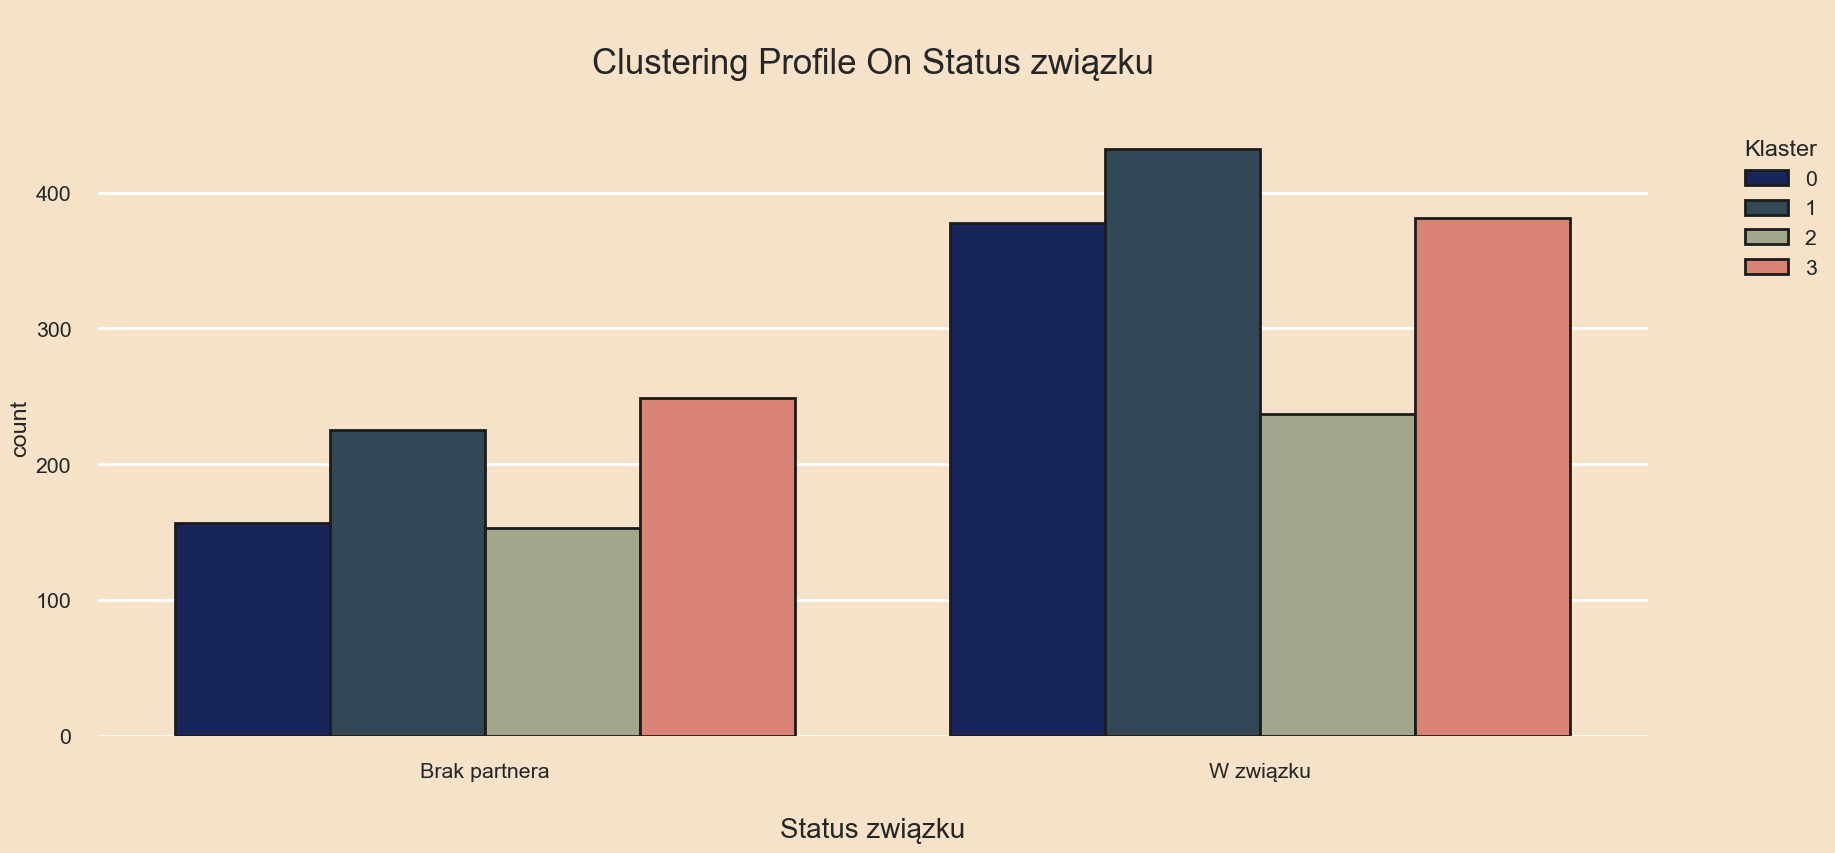

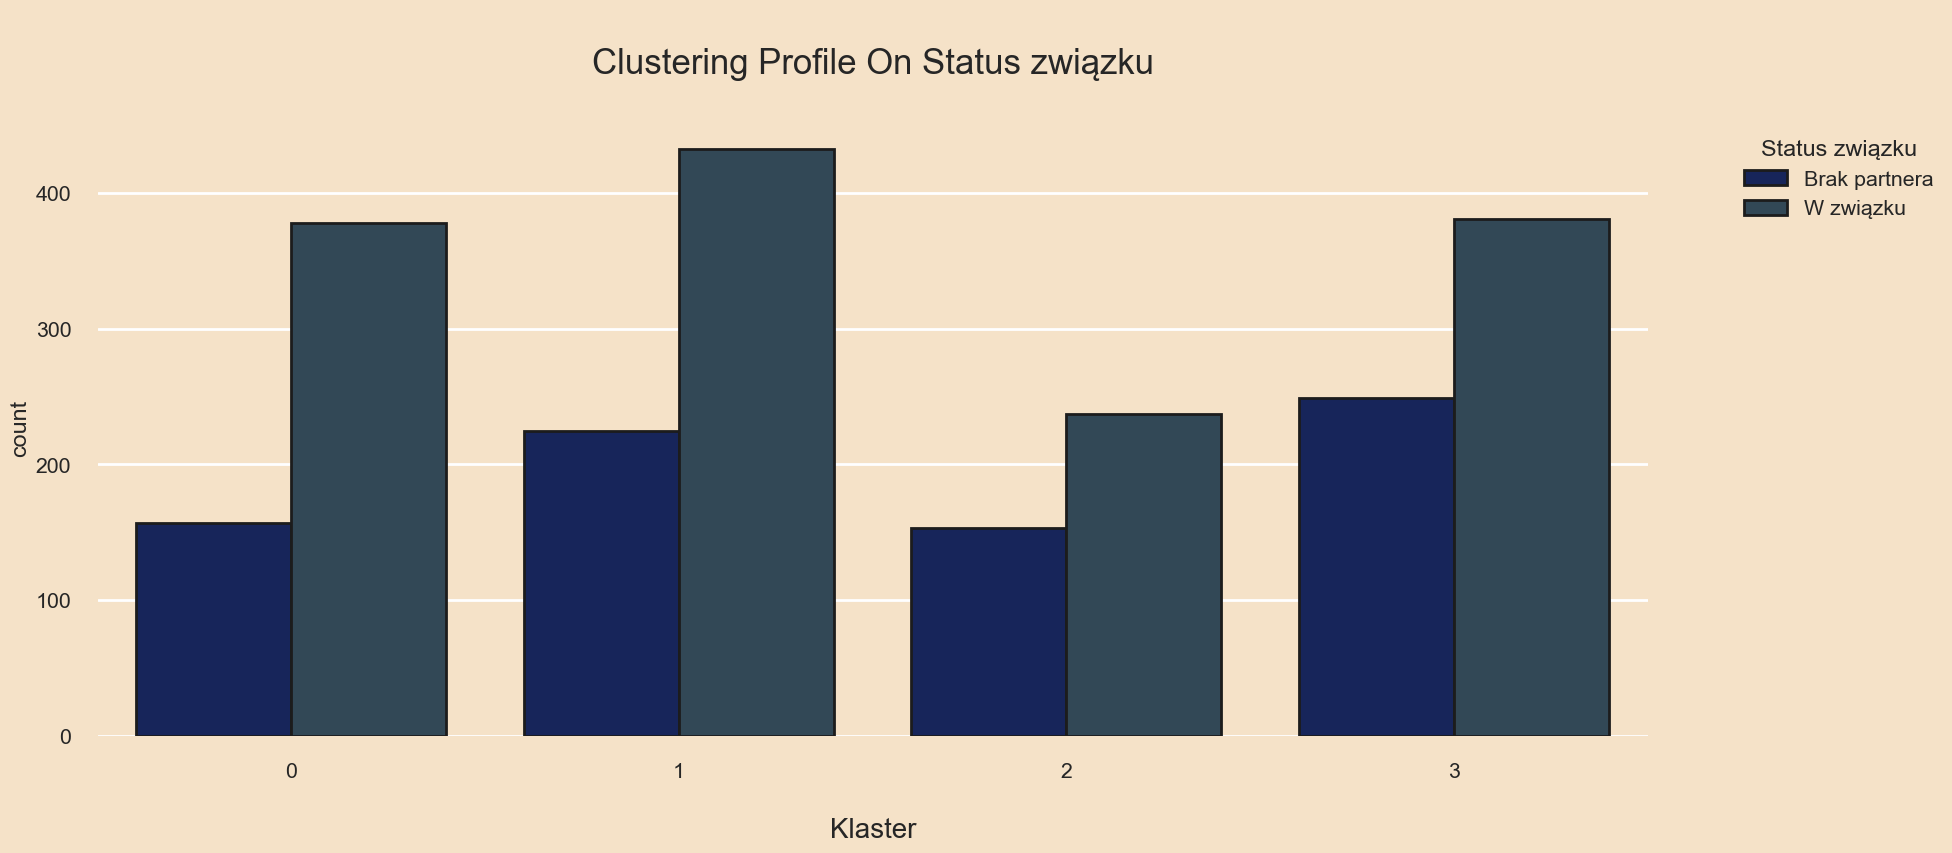

In [475]:
print(f"Characteristics of clusters based on marital status :")

mapowanie_cywil = {0: 'Brak partnera', 1: 'W związku'}
new_df['Status związku'] = new_df['Marital Status'].replace(mapowanie_cywil)
cluster_f("Status związku")
cluster_odwrotnie("Status związku", "Status związku")

Characteristics of clusters based on customer loyalty :


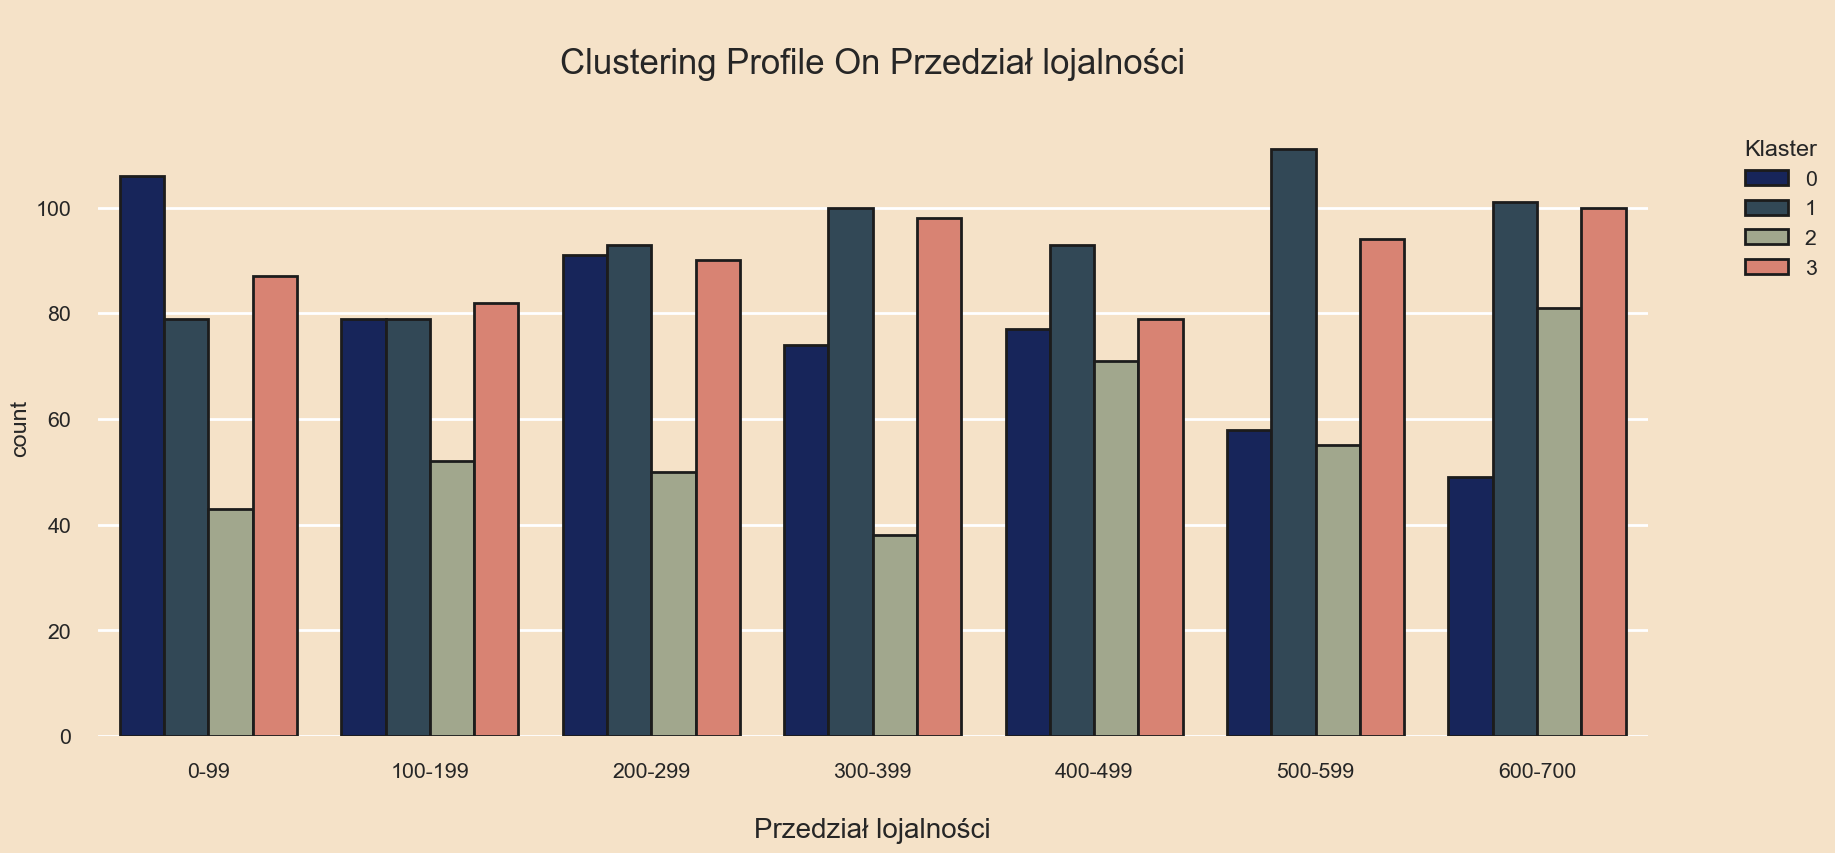

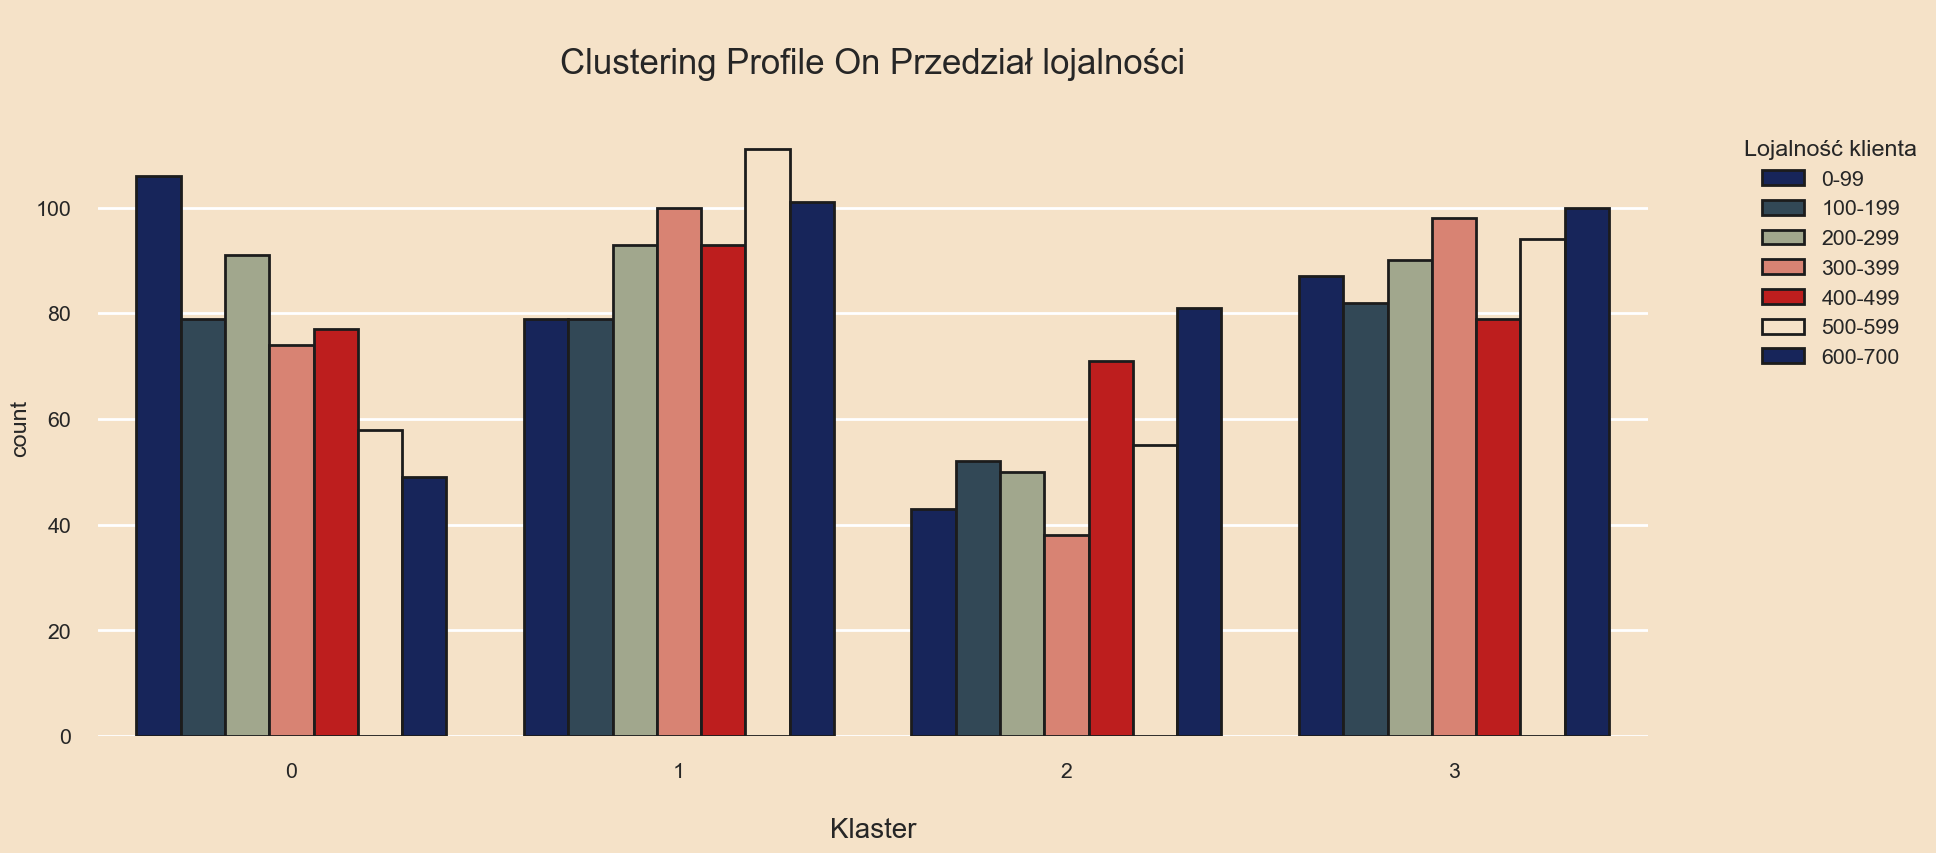

In [476]:
print(f"Characteristics of clusters based on customer loyalty :")
bins = [0, 99, 199, 299, 399, 499, 599, 700]
labels = ['0-99','100-199', '200-299', '300-399', '400-499', '500-599', '600-700']

# Dodawanie nowej kolumny z podziałem wiekowym
new_df['Przedział lojalności'] = pd.cut(new_df['Customer Loyalty'], bins=bins, labels=labels)
cluster_f("Przedział lojalności")
cluster_odwrotnie("Przedział lojalności", "Lojalność klienta")

Characteristics of clusters based on purchases :


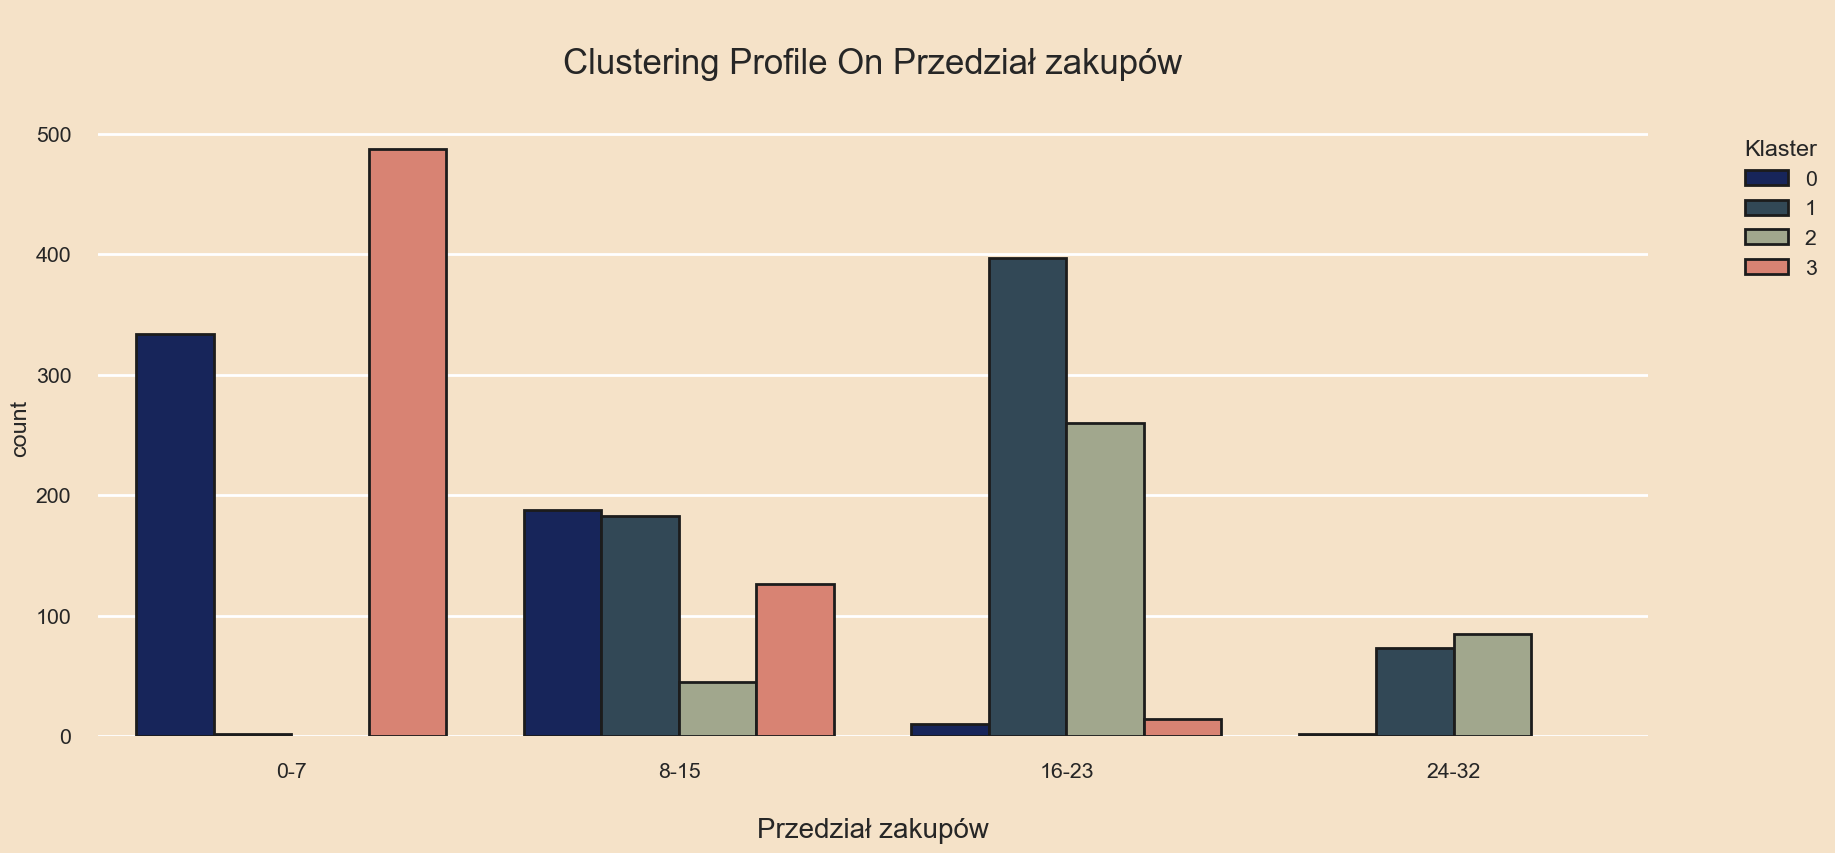

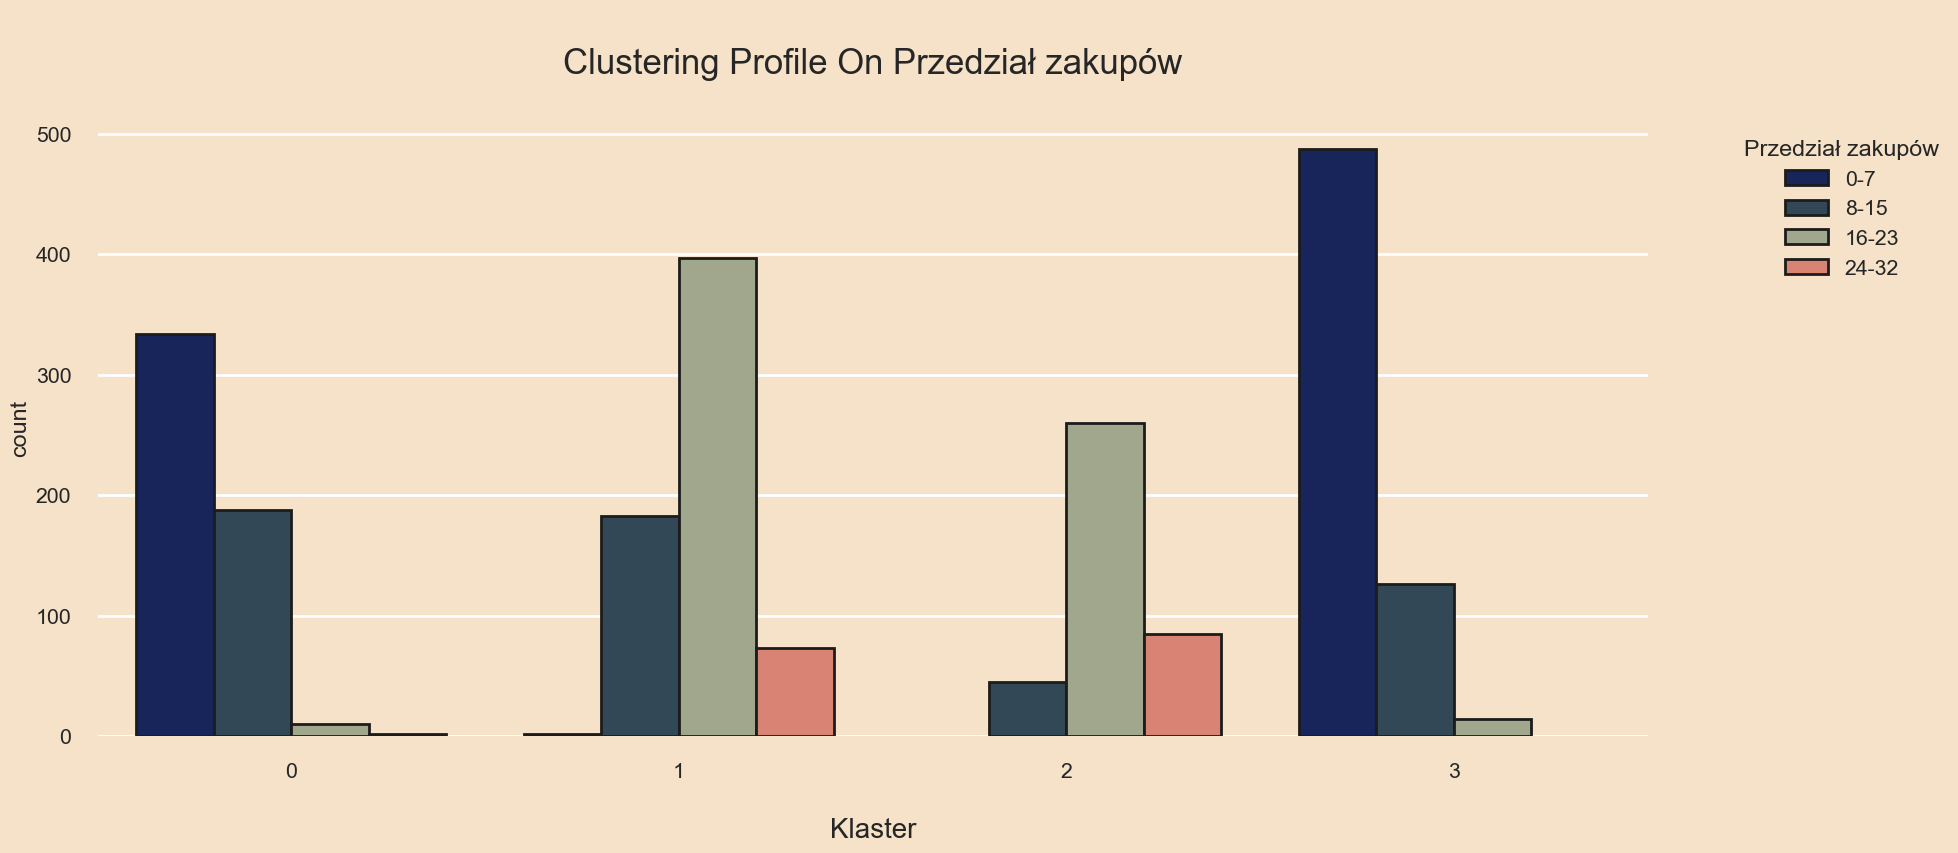

In [477]:
print(f"Characteristics of clusters based on purchases :")
bins = [0, 7, 15, 23, 32]
labels = ['0-7','8-15', '16-23', '24-32']

# Dodawanie nowej kolumny z podziałem wiekowym
new_df['Przedział zakupów'] = pd.cut(new_df['Purchases'], bins=bins, labels=labels)

cluster_f("Przedział zakupów")
cluster_odwrotnie("Przedział zakupów", "Przedział zakupów")